# EDA

### Introduction
As the growth of police brutality is more accentuated in today’s society, so does the need to understand ontological problems rooted within law enforcement. More specifically, vast data exists on law enforcement that is available to the public. Some of this data includes data regarding ethnicity, officer rank, and many more features. To better understand cyclical patterns within police departments and aid in the fight against police brutality, we decided to analyze the NYPD Civilian Complaint data set from the pro publica data store which can be found at https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers. The dataset comprises 33358 closed cases against NYPD officers spanning from September of 1985 to June of 2020, as well as vast information about officers including their ethnicity, gender, rank, and much more. To drive our analysis, we wanted to answer the following question: Do ethnic disparities amongst officers who are complained against exist and are these disparities statistically significant? If so, what are the implications of this significance on the fairness of policing in New York?

### Cleaning and EDA
Transitioning to cleaning our dataset, we focused on preparing/wrangling the data so that it would be useable for our EDA, permutation tests, and hypothesis test. We found that the columns complainant_ethnicity and complainant_gender had some fillers like "Unknown" and "Not described" which we filled with nan. Also, created some new columns using one hot encoding to display officer ranks as integers, which we utilize in our EDA. To start our EDA, we performed a Univariate Analysis on several aspects of our data. We first looked at the ethnic and gender breakdown of officers accused, and complainants in the NYPD. Overwhelmingly, we found that white, male officers had the most complaints against them, and black male civilians were the most common demographic of complainant. We also looked into the grouped counts of FADO (Abuse of Authority, Discourtesy, Force, and Offensive Language) and found that Abuse of Authority was the most common grouping of complaint. Lastly, using our one hot encoding to map police officer ranks to integers, we found that officers who had incidents on average dropped down about .7 of a level from when the incident occured to where the incident case was closed (a dropping from sergeant to detective or inspector would be -1, and from Deputy Inspector to Police Officer would be -5 for example (rankings found on NYPD website)), which shows that there is at least some sort of accountability for officers who have complaints against them. Moving on to the bivariate analysis, we first continued this idea of average rank change before and after a complaint, and broke this down by race. White officers had the biggest drop off on average at just over .7 (since there is such a large portion of white officers, the total average among all ethnicities is still roughly .7). We also created 4 pivot tables with 4 corresponding horizontal bar plots. The first pivot/graph displays the race of the officer versus their disposition. From this we saw that there is a high number of unsubstantiated and exonerated complaints, which shows that majority of cases are unsubstantiated, meaning they were investigated but were non conclusive of breaking NYPD rules. Also, the proportion of races amongst these types of disposition is roughly similar (from looking at the graph), which provides evidence that race is not a big factor in the ruling of a case in the NYPD. Following, we performed 3 similar analyses that are further explained in the notebook notes. Finally, we ran some interesting aggregates and found some quite interesting results. First, we analyzed the officer with the most accusations, and found some interesting statistics about the officer. Interestingly, we did some research on the officer and found numerous articles on his history of misconduct. Also, we did some quick analysis on ethnicity versus the average ages of officers accused and complainants, finding the respecitve averages surprisingly within the same range. Using this EDA, we got a better understanding of our data and created some further paths we intend to explore in missingness and hypothesis test.

### Assessment of Missingness
To understand the dependence of missingness between columns in our data set, we conducted permutation tests to understand how the missingness in complainant ethnicity was dependent on the outcome description column and the last name column. After finding our observed test statistis by finding the total variation distance for between the null mean of the complainant ethnicity column and the outcome description column, we ran 500 simulations conducting a similar process where we shuffled the complainant column and calculated the p value by comparing the observed and the simulated data. From this we got a p value of 0 so we had rejected the null hypothesis and had evidence that the complainant ethnicity column was MAR or NMAR dependent on the outcome description column. Conducting a similar process, we concluded that complainant ethnicity was MCAR to the last name column which makes sense as the last name of an individual should most likely not effect the missingness of an individuals ethnicity.

### Hypothesis Test
Through our hypothesis test, we wanted to answer the question: Is the ethnic breakdown of officers with complaints against them (proportions by ethnicity) significantly different from the ethnic breakdown of officers in the NYPD? To set up our model, we stated our Null Hypothesis as: The ethnic breakdown of officers with complaints against them (proportions by ethnicity) is due to chance from the eligible NYPD population, and our Alternative Hypothesis as: The ethnic breakdown of officers with complaints against them (proportions by ethnicity) is not due to chance, and there is a statistically significant difference. As our test statistic, we used the Total Variation Distance, and used a significance level of .01. To set up this test, we first grouped our data set to find the proportions of the ethnicities of officers who have complaints against them. We also used public data on the NYPD BI dashboard to create a list of the proportions of the ethnicities of officers in the NYPD (can be thought of as our population proportions). To find our observed test statistic, we found the total variation statistic of these two distributions, which came out to be roughly .08. To perform our simulation, we drew 10000 samples of roughly 33k officers and found their ethnic breakdowns (same as our dataset) using the sample proportions found with the NYPD ethnicity proportion breakdowns. We then found the TVD of each sample and plotted that as a histogram. Using the histogram, we found our p-value to be 0.0, meaning that we reject the null hypothesis (as our p-value is less than the significance level). This shows that the ethnic breakdown of officers who have complaints against them is highly unlikely to be due simply to random chance and that there is a confounding variable that is causing this difference. This could indicate that there some cyclical racial prejudices rooted within law enforcement in New York. This is also interesting as our EDA displayed more black individuals file complaints against officers (by an overwhelming amount), and there is a larger proportion of white officers that have complaints against them. If we were to continue this project, we would further investigate this racial dilemma and see if we can draw some statistical conclusions from that analysis.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Cleaning and EDA

In [2]:
df = pd.read_csv("data/allegations.csv")
df.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


#### Data Cleaning

In [3]:
# Basic Cleaning 

df.loc[(df["complainant_ethnicity"] == "Unknown") | (df["complainant_ethnicity"] == "Refused"), "complainant_ethnicity"] = np.nan
df.loc[(df["complainant_gender"] == "Not described"), "complainant_gender"] = np.nan
df["full_name"] = df["first_name"] + " " + df["last_name"]

# Hot Encoder Helper Function

def hot_encoder(x):
    if x == 'Police Officer':
        return 1
    if x == 'Detective' or x == 'Inspector':
        return 2
    if x == 'Sergeant':
        return 3
    if x == 'Lieutenant':
        return 4
    if x == 'Captain':
        return 5
    if x == 'Deputy Inspector':
        return 6
    if x == 'Chiefs and other ranks':
        return 6
    return np.nan

# Applying hot_encoder to officer ranks
df['encoded_ranks_now'] = df['rank_now'].apply(hot_encoder)
df['encoded_ranks_incident'] = df['rank_incident'].apply(hot_encoder)
df['rank_change'] = df['encoded_ranks_incident'] - df['encoded_ranks_now']
df.head()


,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,full_name,encoded_ranks_now,encoded_ranks_incident,rank_change
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Jonathan Ruiz,1,1,0
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),John Sears,1,1,0
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),John Sears,1,1,0
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),John Sears,1,1,0
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),Noemi Sierra,1,1,0


##### In this basic data cleaning, we simply added missingness to columns (replacing values like "Unknown" and "Not Described" in race and gender columns with Null Values), and created a "full name" column that combines an officers first and last name, setting up our EDA. Also, we created a one hot encoder helper to make three new columns encoding officer ranks at "incident" and "now", along with the difference between them to be used later in univariate analysis.

#### Univariate Analysis

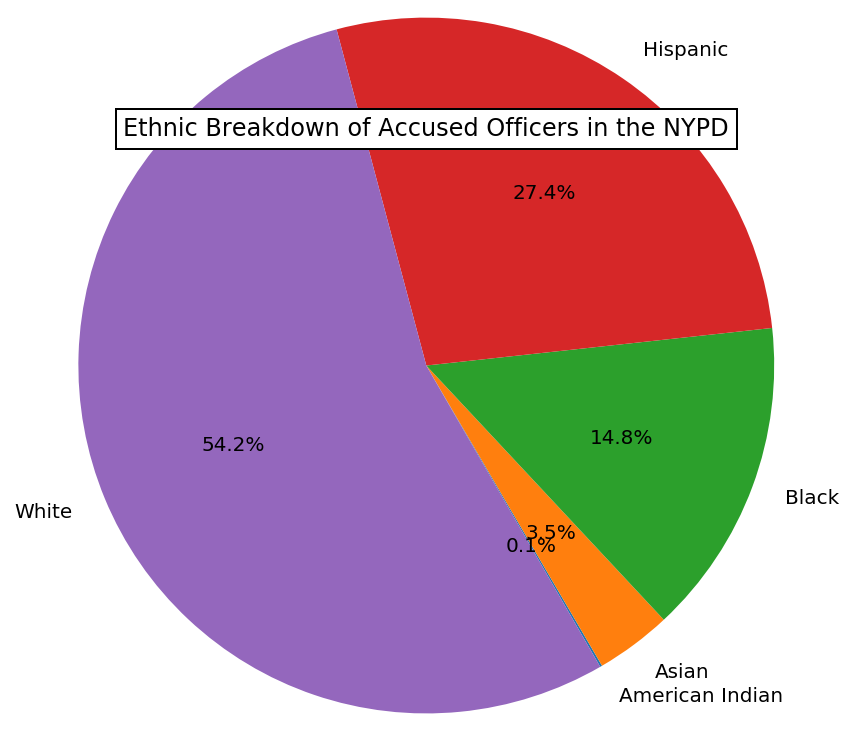

In [4]:
# Pie chart of officer race breakdown
mos_ethnicity_prop = df.groupby("mos_ethnicity")["mos_ethnicity"].count() / len(df)
fig1, ax1 = plt.subplots()
ax1.pie(mos_ethnicity_prop, autopct='%1.1f%%', labels = mos_ethnicity_prop.index, startangle=300, radius = 2)
plt.title("Ethnic Breakdown of Accused Officers in the NYPD", bbox={'facecolor':'1.0'})
plt.show()

##### Above is a pie chart displaying the Ethnic Breakdown of Accused Officers in the NYPD. White officers have a majority of the complaints against them at 54.2%, followed by Hispanic, Black, and Asian Officers at 27.4, 14.8, 3.5, and .1 percent respectively

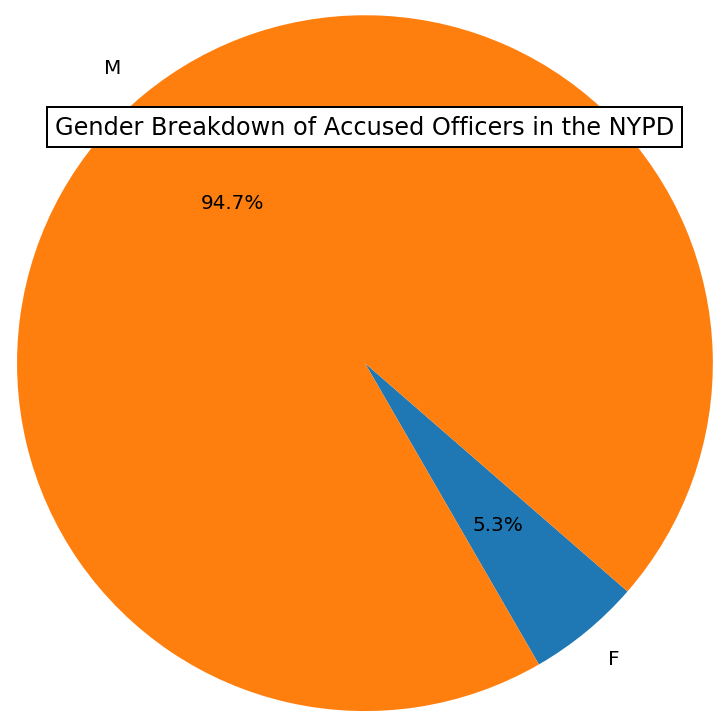

In [5]:
# Pie chart of officer gender breakdown

mos_gender_prop = df.groupby("mos_gender")["mos_gender"].count() / len(df)
fig1, ax1 = plt.subplots()
ax1.pie(mos_gender_prop, autopct='%1.1f%%', labels = mos_gender_prop.index, startangle=300, radius = 2)
plt.title("Gender Breakdown of Accused Officers in the NYPD", bbox={'facecolor':'1.0'})
plt.show()

##### SImilarly, the visualization displayed here is a pie chart of the Gender Breakdown of Accused Officers in the NYPD. Male Officers have a much larger proportion of complaints against them at around 95%, compared to 5% of female officers

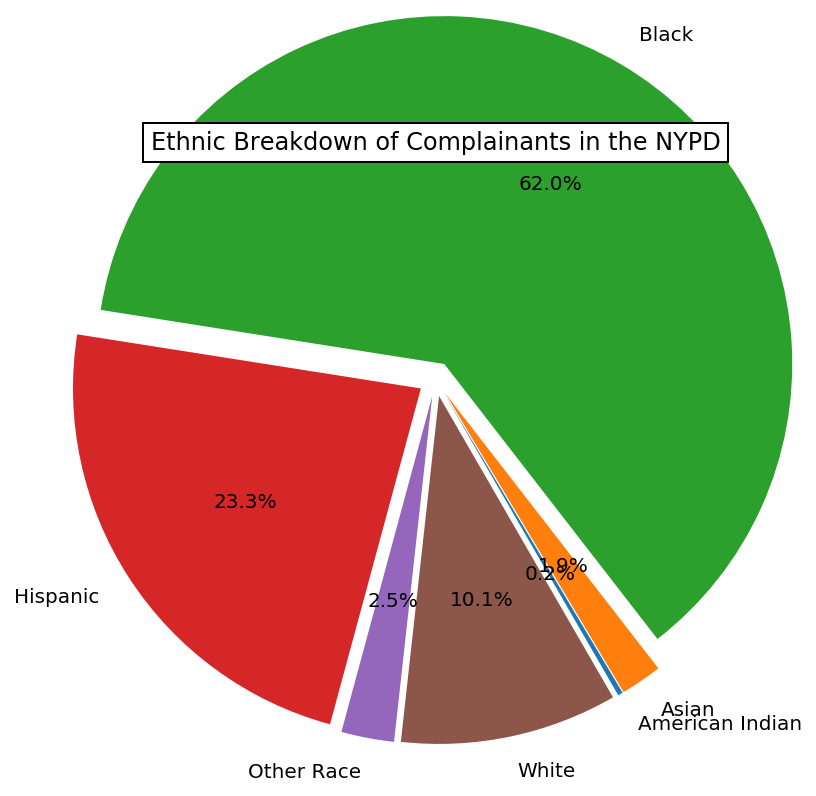

In [6]:
# Pie chart of complainants racial breakdown

c_eth_prop = df.groupby("complainant_ethnicity")["complainant_ethnicity"].count() / len(pd.DataFrame(df["complainant_ethnicity"]).dropna())
fig1, ax1 = plt.subplots()
ax1.pie(c_eth_prop, autopct='%1.1f%%', labels = c_eth_prop.index, explode = [.1, .1, .1, .1, .1, .1], startangle=300, radius = 2)
plt.title("Ethnic Breakdown of Complainants in the NYPD", bbox={'facecolor':'1.0'})
plt.show()



##### Displayed here is another pie chart displaying the Ethnic Breakdown of people who filed formal complaints against officers in the NYPD. Black individuals have a much larger proportion of complaints filed that 62%, with the other listed ethnicities combining to fill the other 38% of complaints.

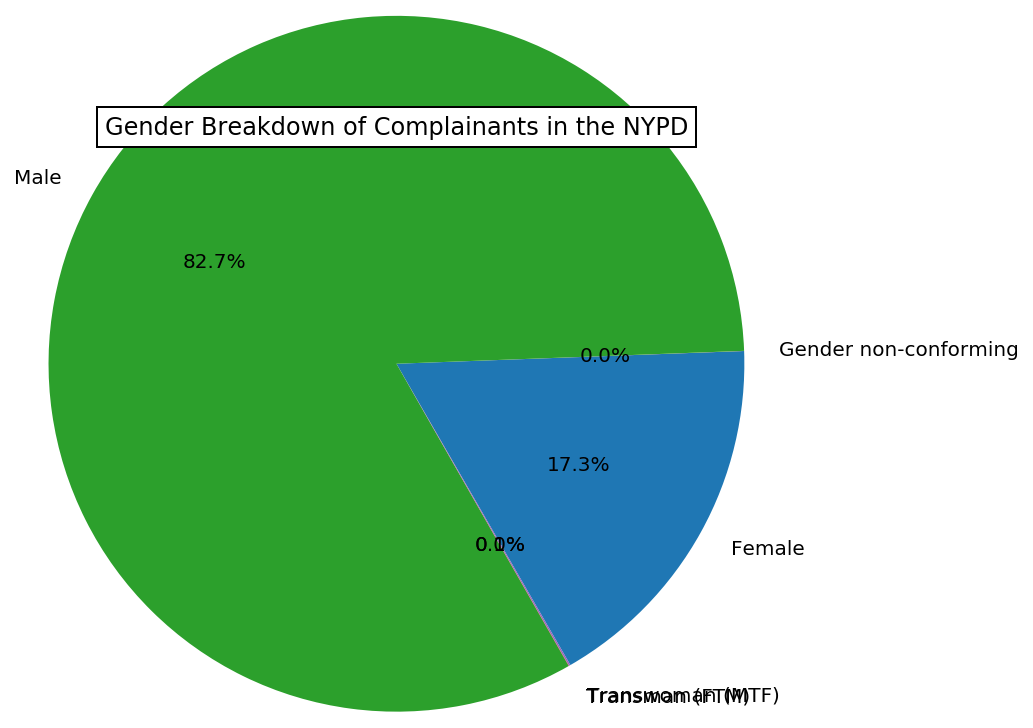

In [7]:
# Pie chart of complainant gender breakdown
c_gender_prop = df.groupby("complainant_gender")["complainant_gender"].count() / len(pd.DataFrame(df["complainant_gender"]).dropna())
fig1, ax1 = plt.subplots()
ax1.pie(c_gender_prop, autopct='%1.1f%%', labels = c_gender_prop.index, startangle=300, radius = 2)
plt.title("Gender Breakdown of Complainants in the NYPD", bbox={'facecolor':'1.0'})
plt.show()

##### Again, above is a visualization of the gender breakdown of people who have filed complaints against officers in the NYPD. Male officers dominate this category as well, making up around 83% of complainants compared to 17.3%

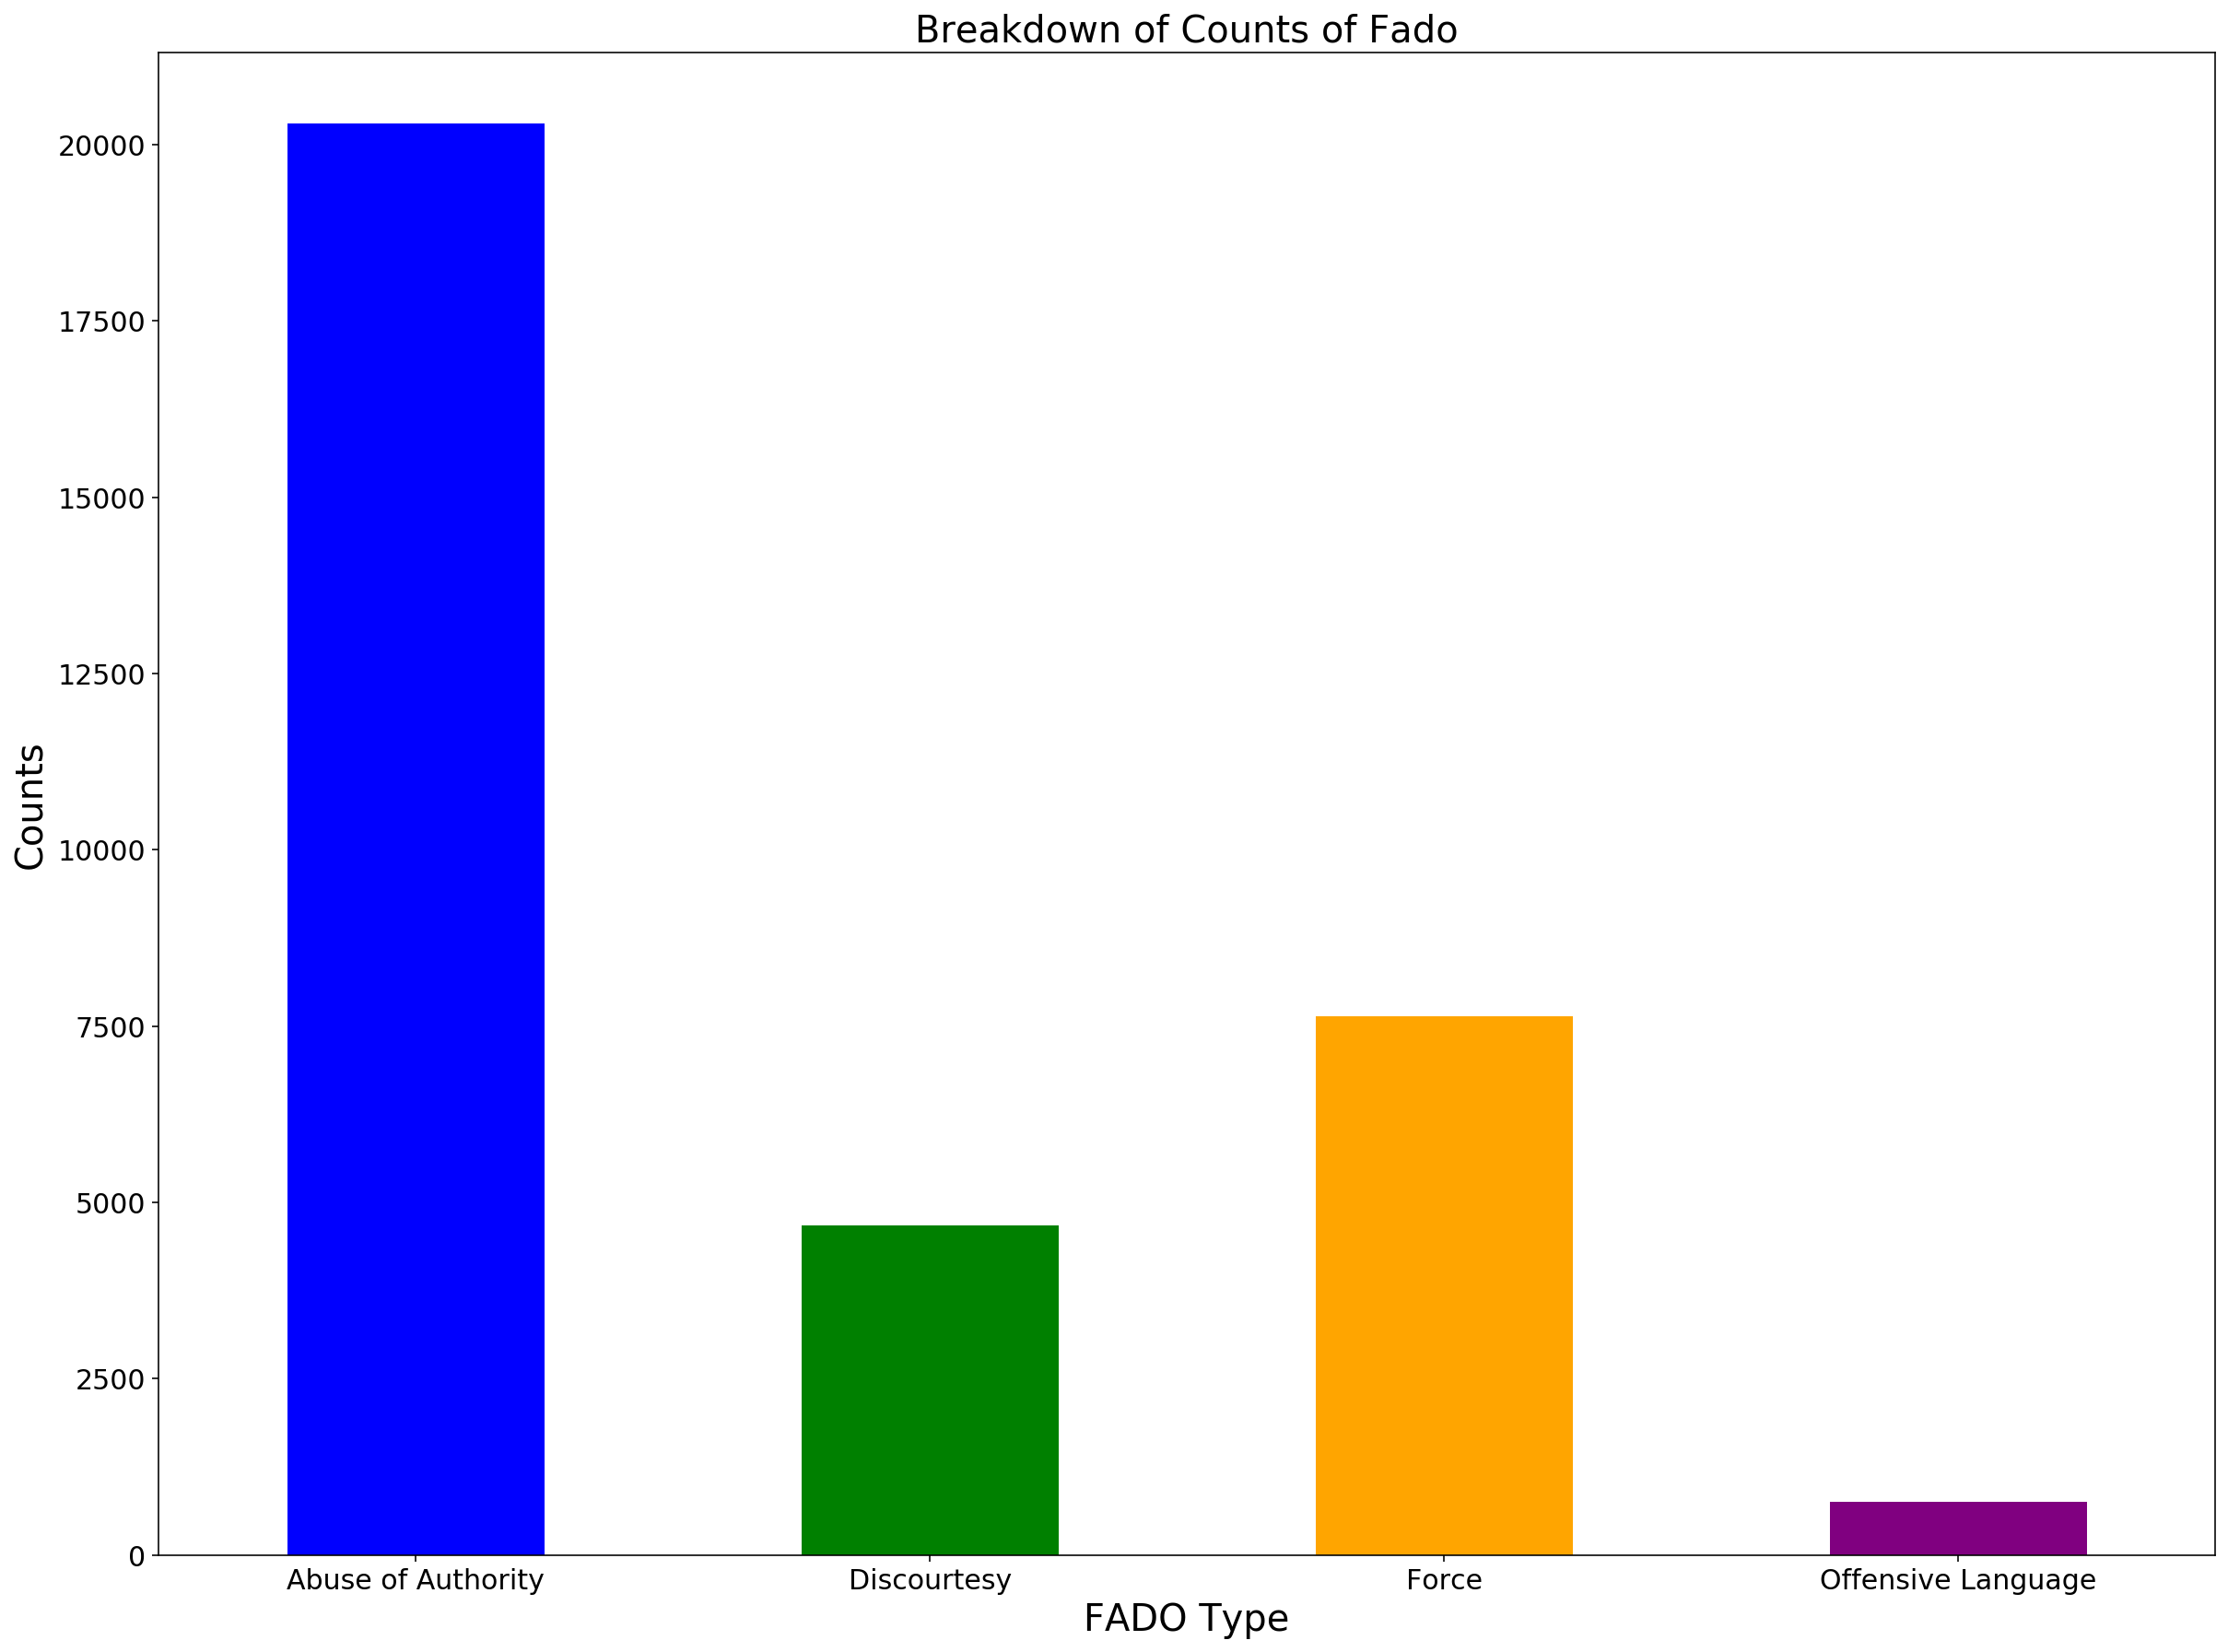

In [8]:
# Fado agg stats

df.groupby("fado_type")["fado_type"].count().plot.bar(rot=0, figsize = (20, 15), color = ["blue", "green", "orange", "purple"])
plt.title("Breakdown of Counts of Fado", size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("FADO Type", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.show()


##### Displayed above is a visualisation encapsulating the breakdown counts of FADO (Abuse of Authority, Discourtesy, Force, and Offensive Language) in the NYPD. Abuse of authority is clearly the most common occurence with around 2000 total counts, followed by force, discourtesy, and offensive language

In [9]:
# On average how did the ranks change from the incident to now

df['rank_change'].mean()

-0.6916781581629594

##### Using the columns created in the data cleaning, we found the on average, officers who had incidents dropped ranks by an average of -.7 (using one hot encoding)

#### Bivariate Analysis

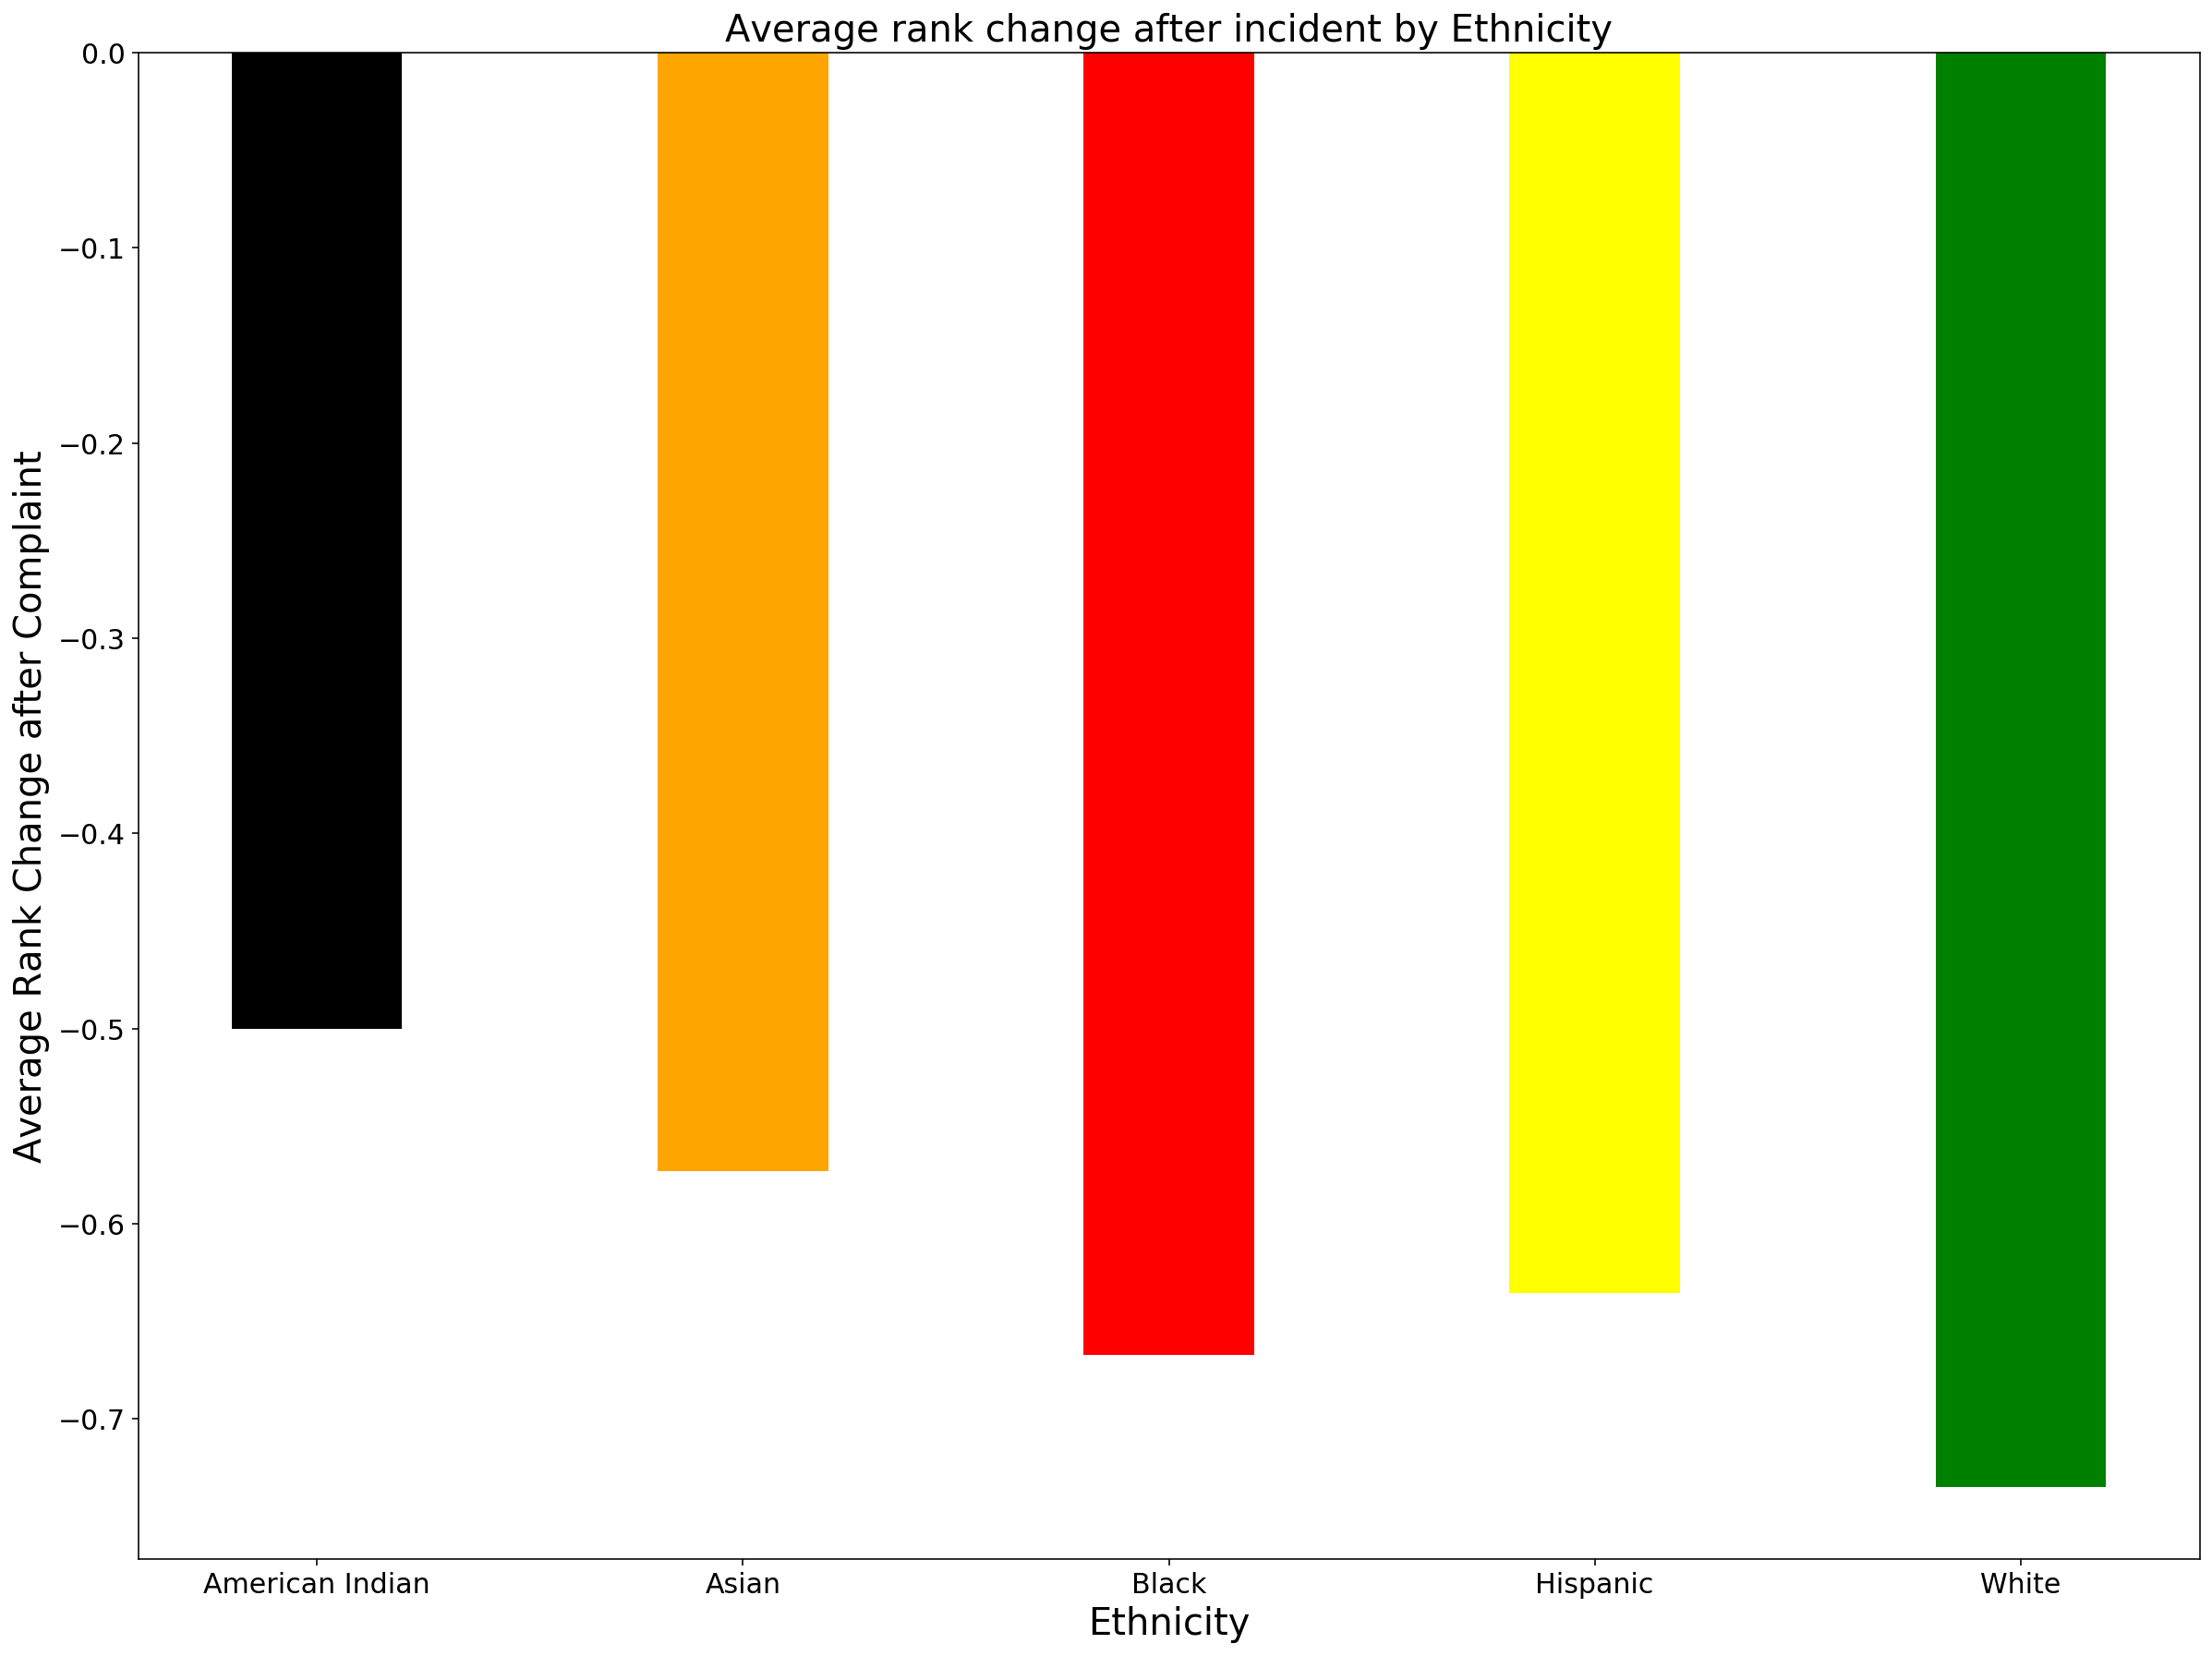

In [10]:
# Bar chart of ranking change based on the Ethnicity of different officers

officer_race_df = df.groupby('mos_ethnicity').mean()
races = officer_race_df.index.tolist()
rank_changes = officer_race_df['rank_change'].values.tolist()
fig = plt.figure(figsize = (20, 15))
plt.bar(races, rank_changes, color = ['black', 'orange', 'red', 'yellow', 'green'],
        width = 0.4)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("FADO Type", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xlabel("Ethnicity")
plt.ylabel("Average Rank Change after Complaint")
plt.title("Average rank change after incident by Ethnicity", size = 20)
plt.show()

##### We can see from this graph that white officers seem to have the largest decreases in rank after incidents while American Indians seem to be affected the least, though a big reason for this could be that the number of American Indian officers is much smaller than white officers. Consequently, each  American Indian police officer with an incident has a much larger affect on their proportions in comparison to other races.

In [11]:
# Pivot table of race of officer vs disposition 

pd.pivot_table(df, values = 'allegation', index = 'board_disposition', columns = 'mos_ethnicity', aggfunc = 'count').fillna(0)

mos_ethnicity,American Indian,Asian,Black,Hispanic,White
board_disposition,,,,,
Exonerated,7.0,333.0,1374.0,2546.0,5349.0
Substantiated (Charges),4.0,125.0,611.0,1004.0,2052.0
Substantiated (Command Discipline A),0.0,52.0,146.0,294.0,472.0
Substantiated (Command Discipline B),0.0,37.0,102.0,243.0,407.0
Substantiated (Command Discipline),0.0,31.0,109.0,222.0,489.0
Substantiated (Command Lvl Instructions),0.0,23.0,62.0,142.0,227.0
Substantiated (Formalized Training),0.0,75.0,148.0,316.0,494.0
Substantiated (Instructions),0.0,18.0,44.0,65.0,121.0
Substantiated (MOS Unidentified),0.0,0.0,0.0,0.0,1.0


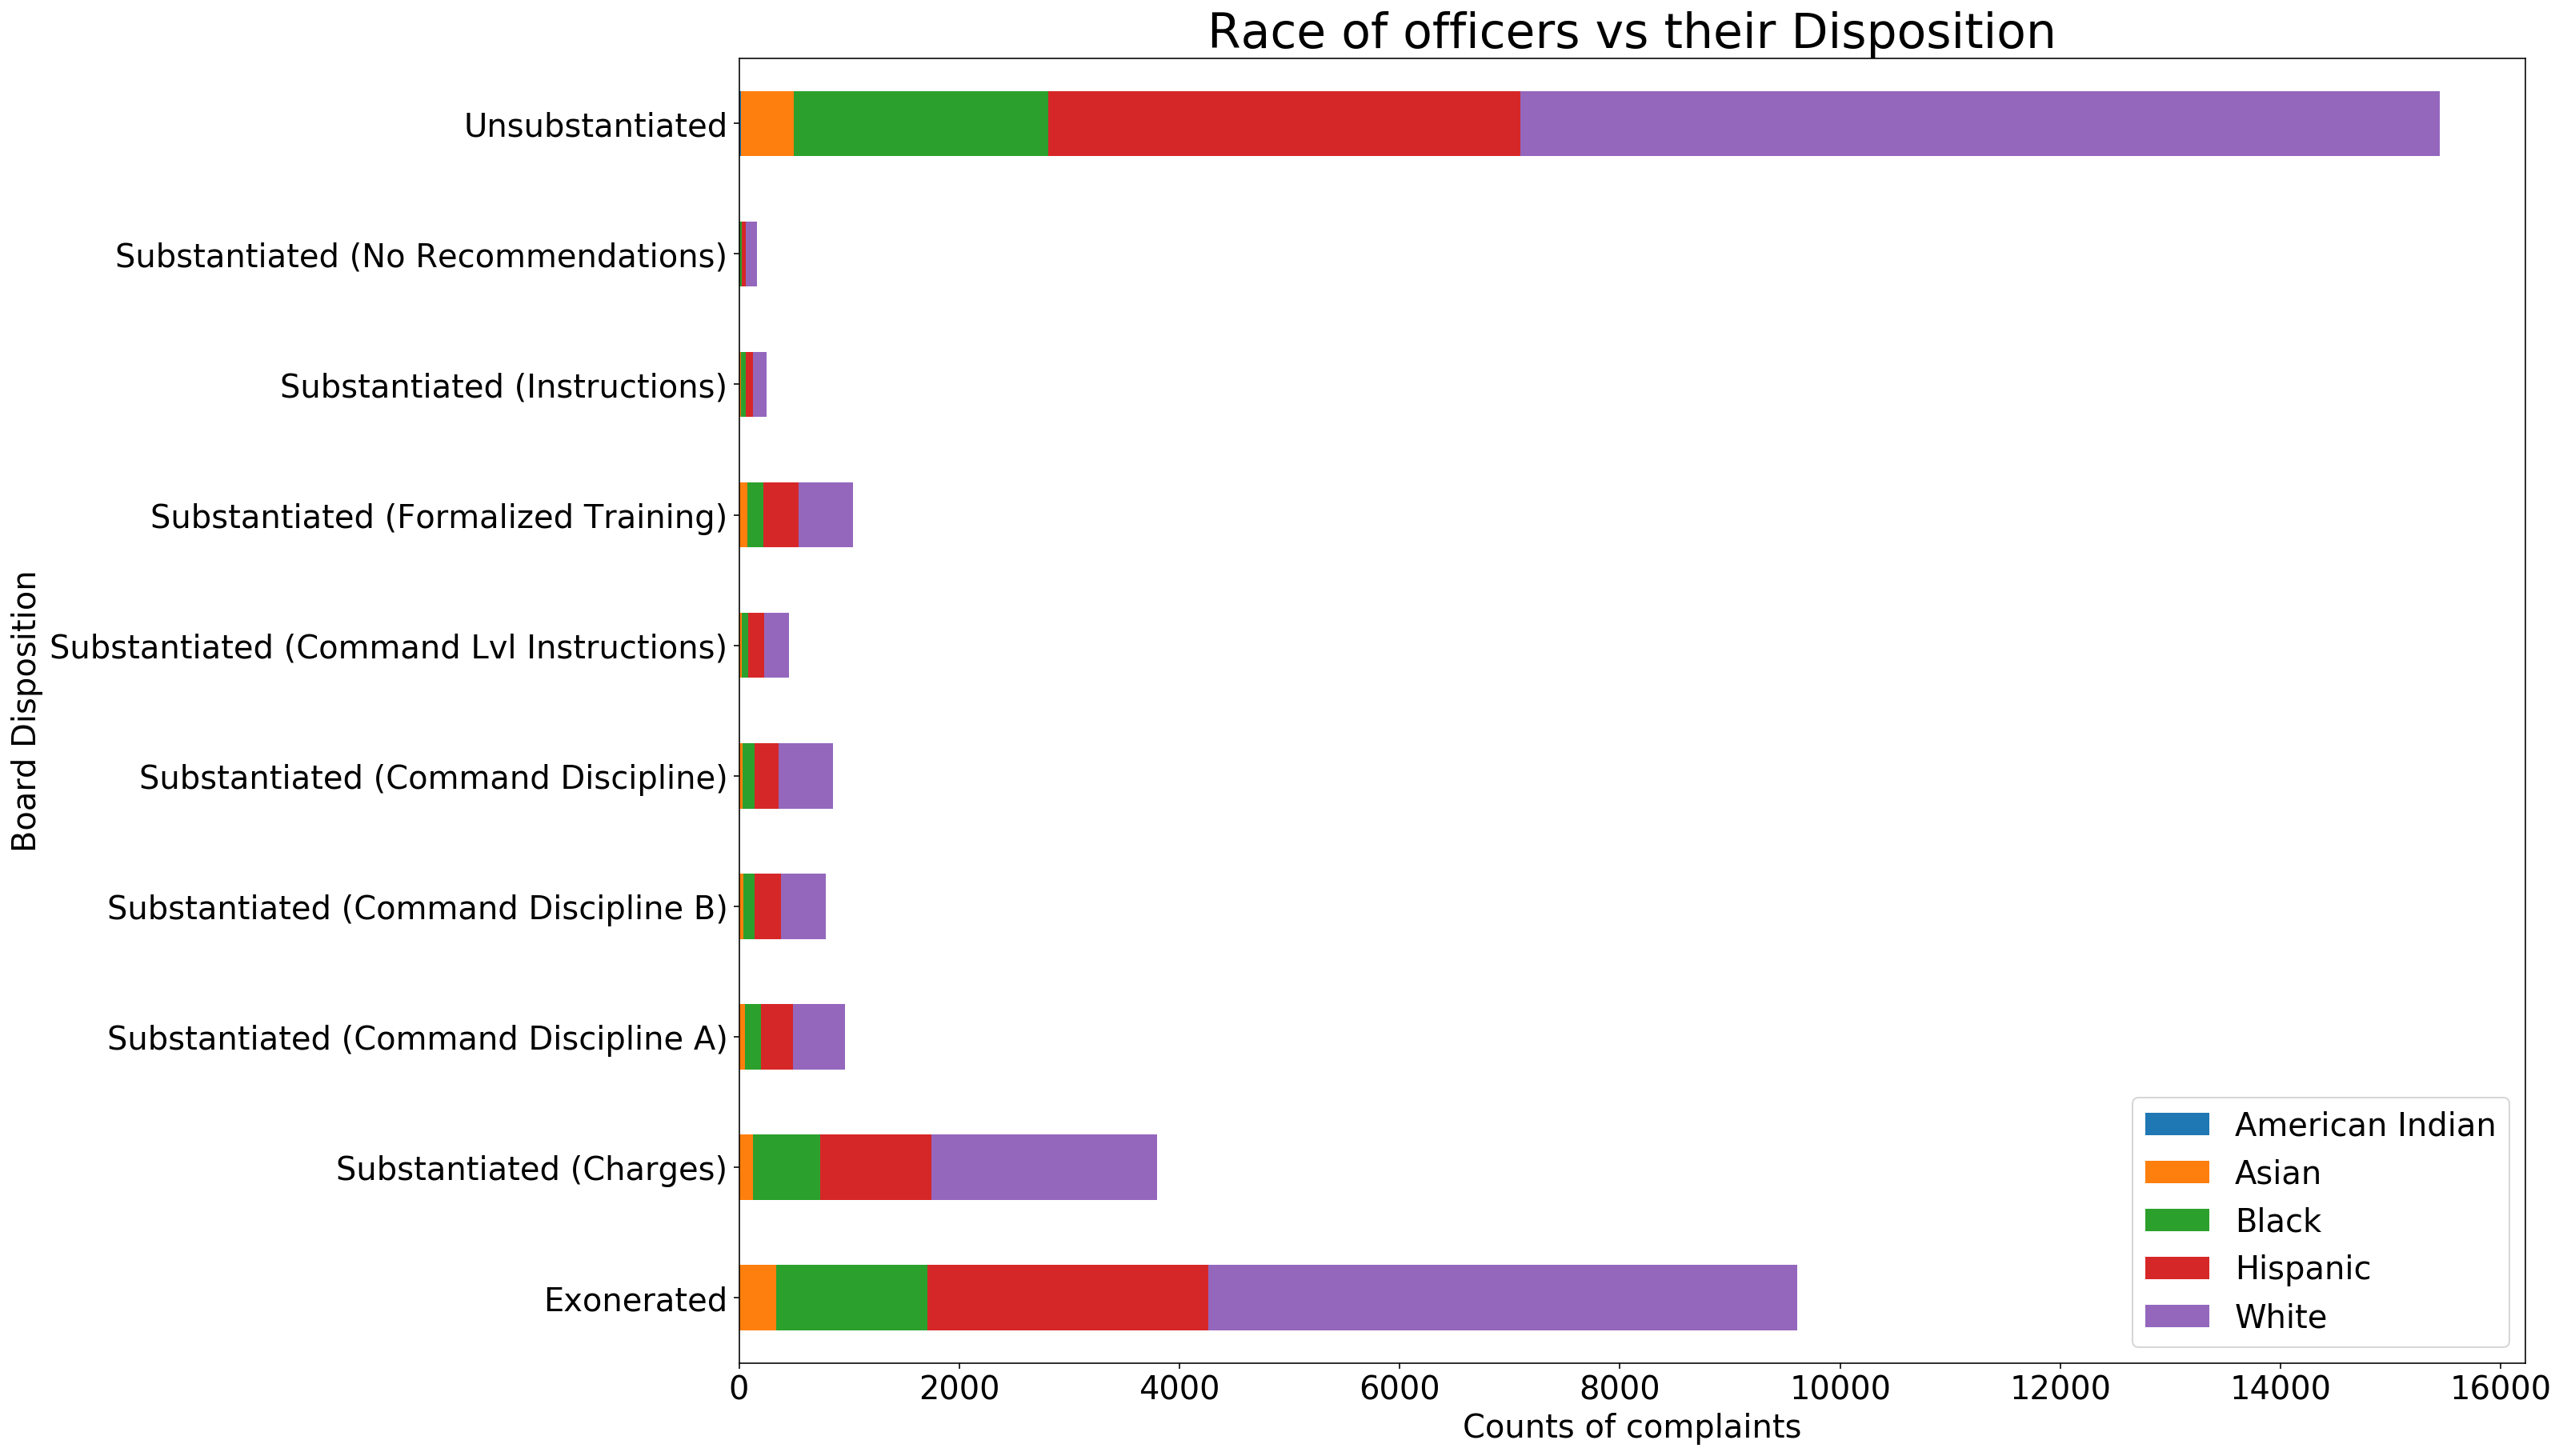

In [12]:
# Viz of pivot table of race of officer vs disposition 

a = df.groupby('board_disposition')['mos_ethnicity']\
    .value_counts().drop('Substantiated (MOS Unidentified)')\
    .unstack(level=1)\
    .plot.barh(stacked=True, figsize = (20, 15), fontsize = 20)
plt.legend(loc = "lower right", prop={'size': 20})
plt.xlabel('Counts of complaints', fontsize = 20)
plt.ylabel('Board Disposition', fontsize = 20)
plt.title('Race of officers vs their Disposition', fontsize = 30)
plt.show()

#### We can derive a few key points from this graph
- It can be seen that a majority of complaints end up becoming unsubstantiated 
- A majority of unsubstantiated claims come from white individuals which might indicate some bias
- Many hispanic individuals have complaints against them, and they are often exonerated/the complaints are deemed unsubstantiated 

In [13]:
# Pivot table of race of complainant vs disposition 

pd.pivot_table(df, values = 'allegation', index = 'board_disposition', columns = 'complainant_ethnicity', aggfunc = 'count').fillna(0)

complainant_ethnicity,American Indian,Asian,Black,Hispanic,Other Race,White
board_disposition,,,,,,
Exonerated,17.0,149.0,4859.0,1689.0,158.0,697.0
Substantiated (Charges),13.0,58.0,1959.0,735.0,92.0,320.0
Substantiated (Command Discipline A),2.0,26.0,462.0,180.0,19.0,96.0
Substantiated (Command Discipline B),0.0,8.0,415.0,145.0,11.0,83.0
Substantiated (Command Discipline),0.0,7.0,424.0,176.0,10.0,70.0
Substantiated (Command Lvl Instructions),2.0,16.0,195.0,87.0,14.0,54.0
Substantiated (Formalized Training),6.0,36.0,467.0,185.0,31.0,111.0
Substantiated (Instructions),0.0,4.0,108.0,53.0,5.0,38.0
Substantiated (No Recommendations),0.0,0.0,43.0,11.0,0.0,5.0


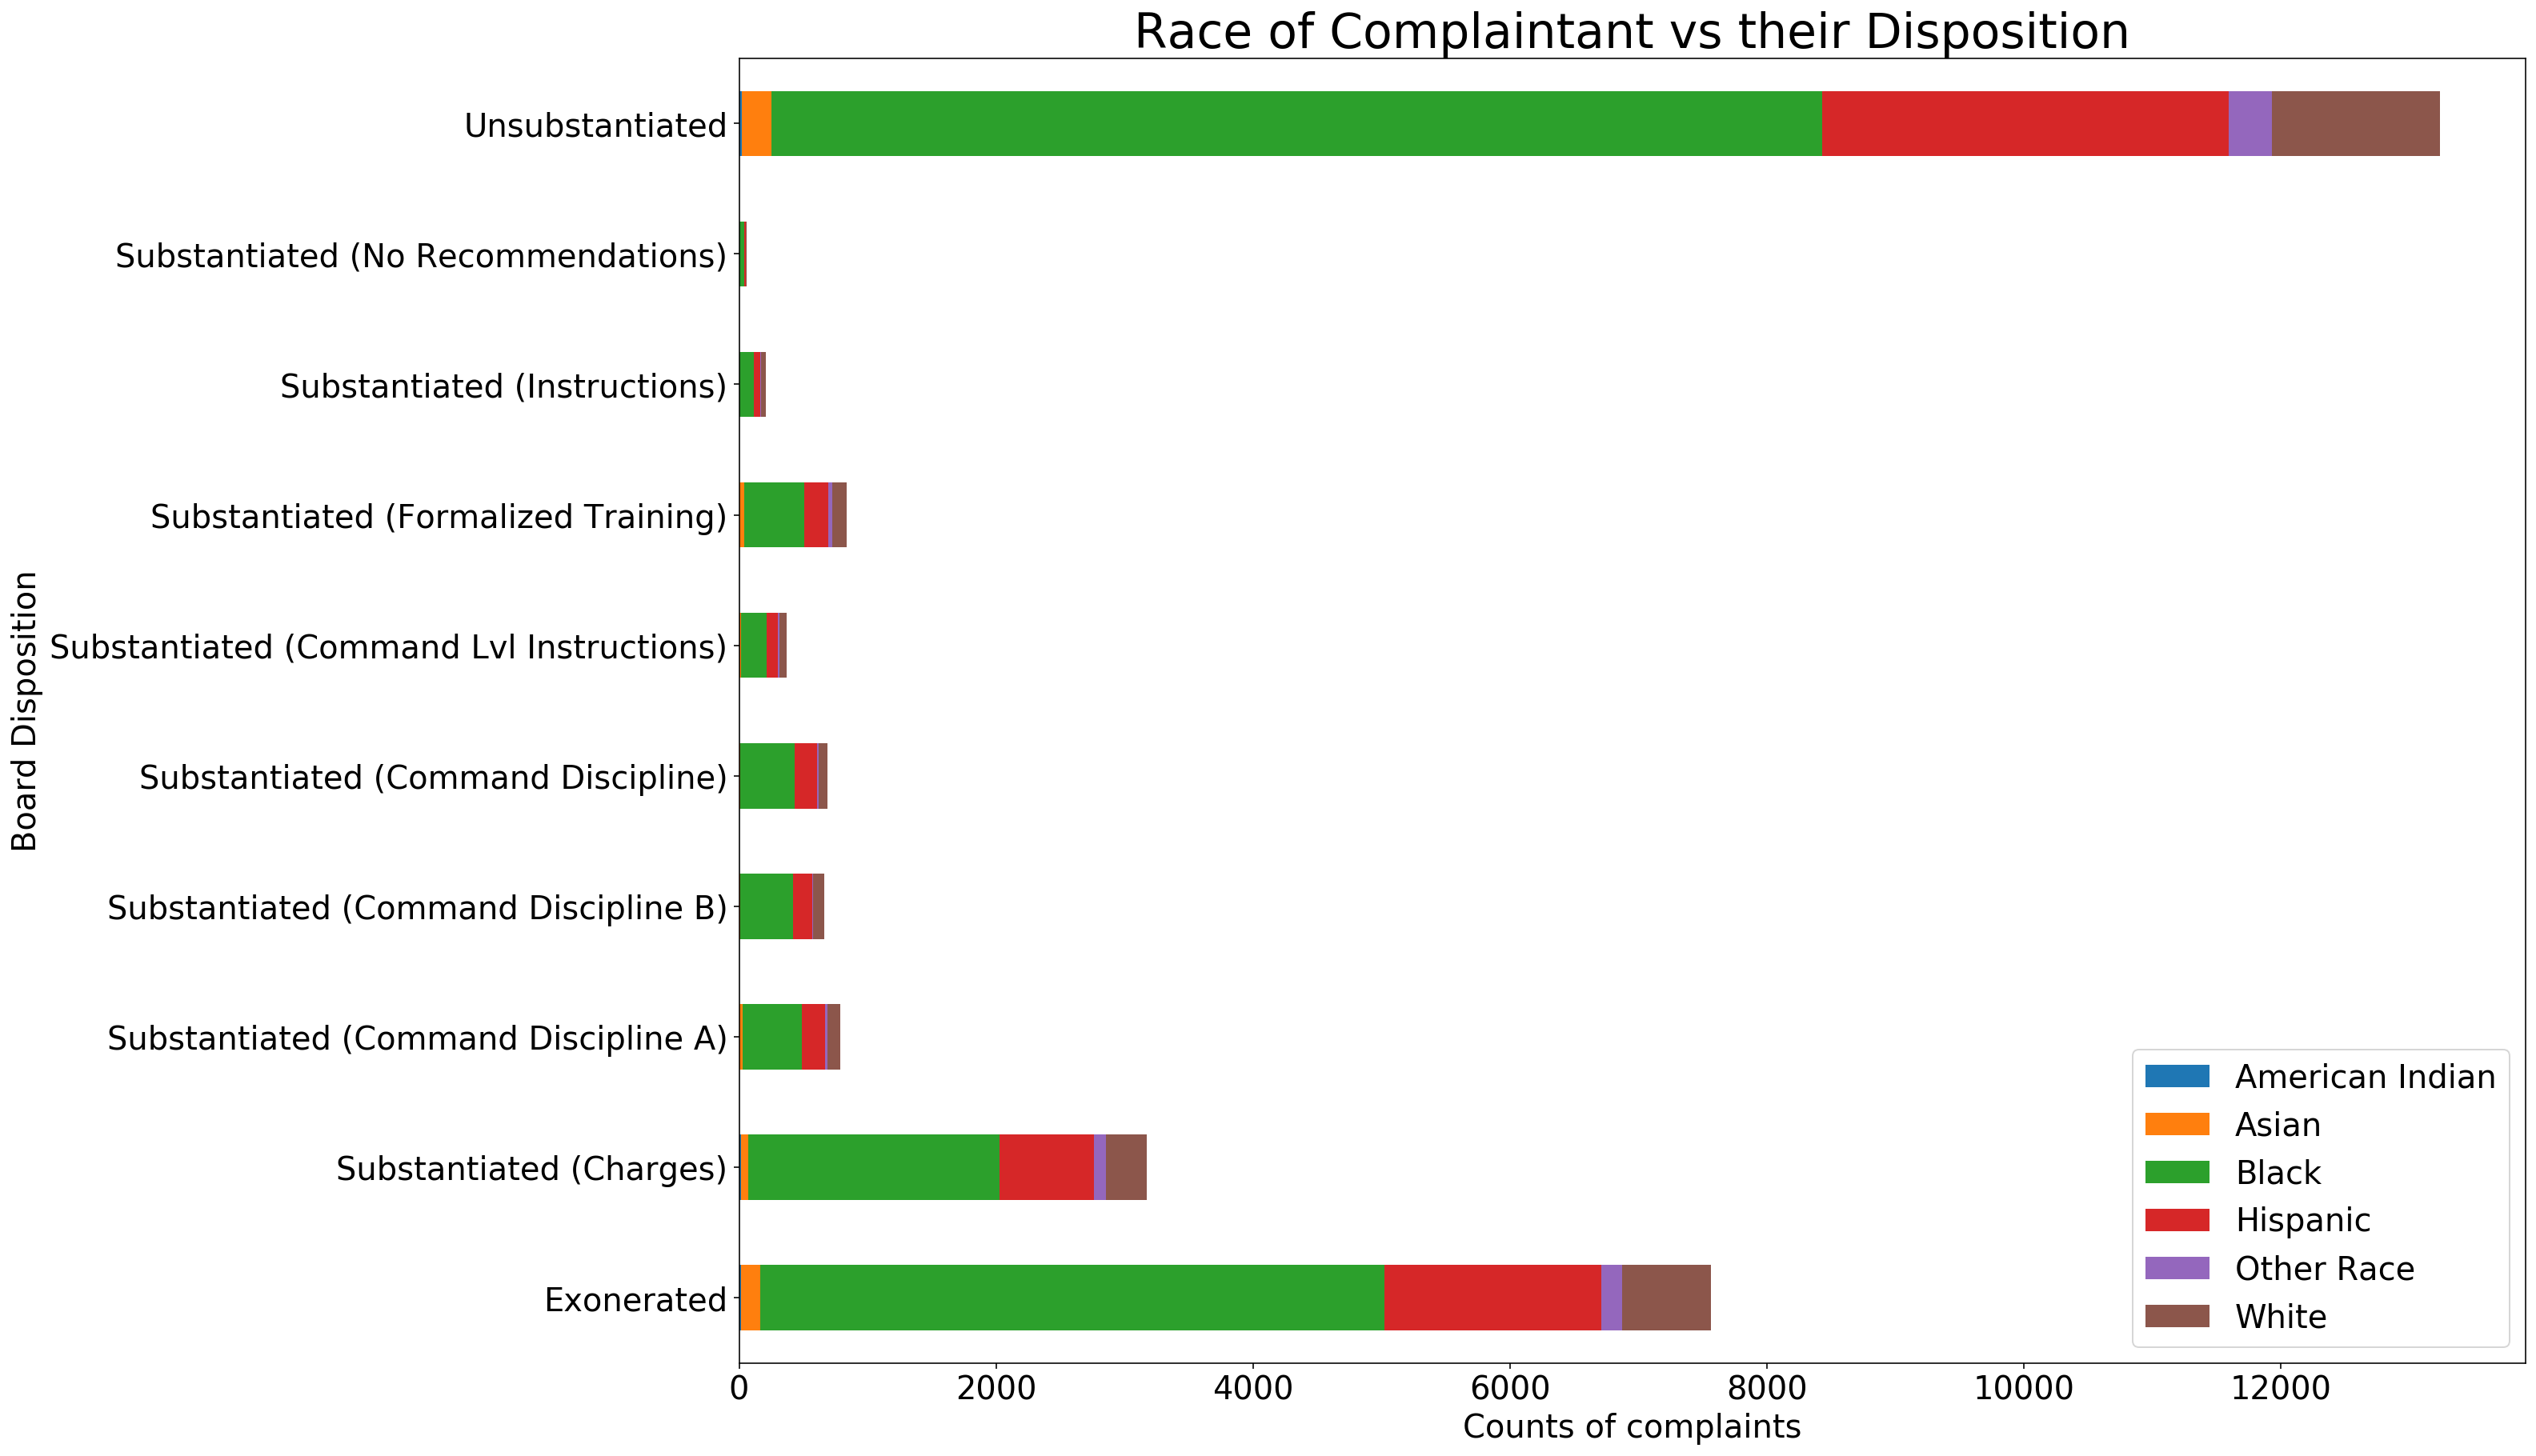

In [14]:
# Viz of pivot table of race of complainant vs disposition 

b = df.groupby('board_disposition')['complainant_ethnicity']\
    .value_counts()\
    .unstack(level=1)\
    .plot.barh(stacked=True, figsize = (20, 15), fontsize = 20)
plt.legend(loc = "lower right", prop={'size': 20})
plt.xlabel('Counts of complaints', fontsize = 20)
plt.ylabel('Board Disposition', fontsize = 20)
plt.title('Race of Complaintant vs their Disposition', fontsize = 30)
plt.show()

#### We can derive a few key points from this graph
- A majority of complaints are from black individuals
- most of black complaints are deemed unsubtantiated 
- Many individuals refuse to give their race 

In [15]:
# Pivot table of race of officer vs outcome description

pd.pivot_table(df, values = 'allegation', index = 'outcome_description', columns = 'mos_ethnicity', aggfunc = 'count').fillna(0)

mos_ethnicity,American Indian,Asian,Black,Hispanic,White
outcome_description,,,,,
Arrest - OGA,0.0,17.0,88.0,195.0,349.0
Arrest - assault (against a PO),0.0,38.0,138.0,274.0,402.0
Arrest - disorderly conduct,0.0,32.0,137.0,299.0,545.0
Arrest - harrassment (against a PO),0.0,0.0,4.0,0.0,11.0
Arrest - other violation/crime,10.0,364.0,1492.0,2752.0,5578.0
Arrest - resisting arrest,2.0,55.0,241.0,461.0,834.0
Arrest on Other Charge,0.0,0.0,3.0,2.0,76.0
Assault/Arrested,0.0,0.0,4.0,5.0,25.0
Disorderly-Conduct/Arr/Summons,0.0,0.0,24.0,11.0,102.0


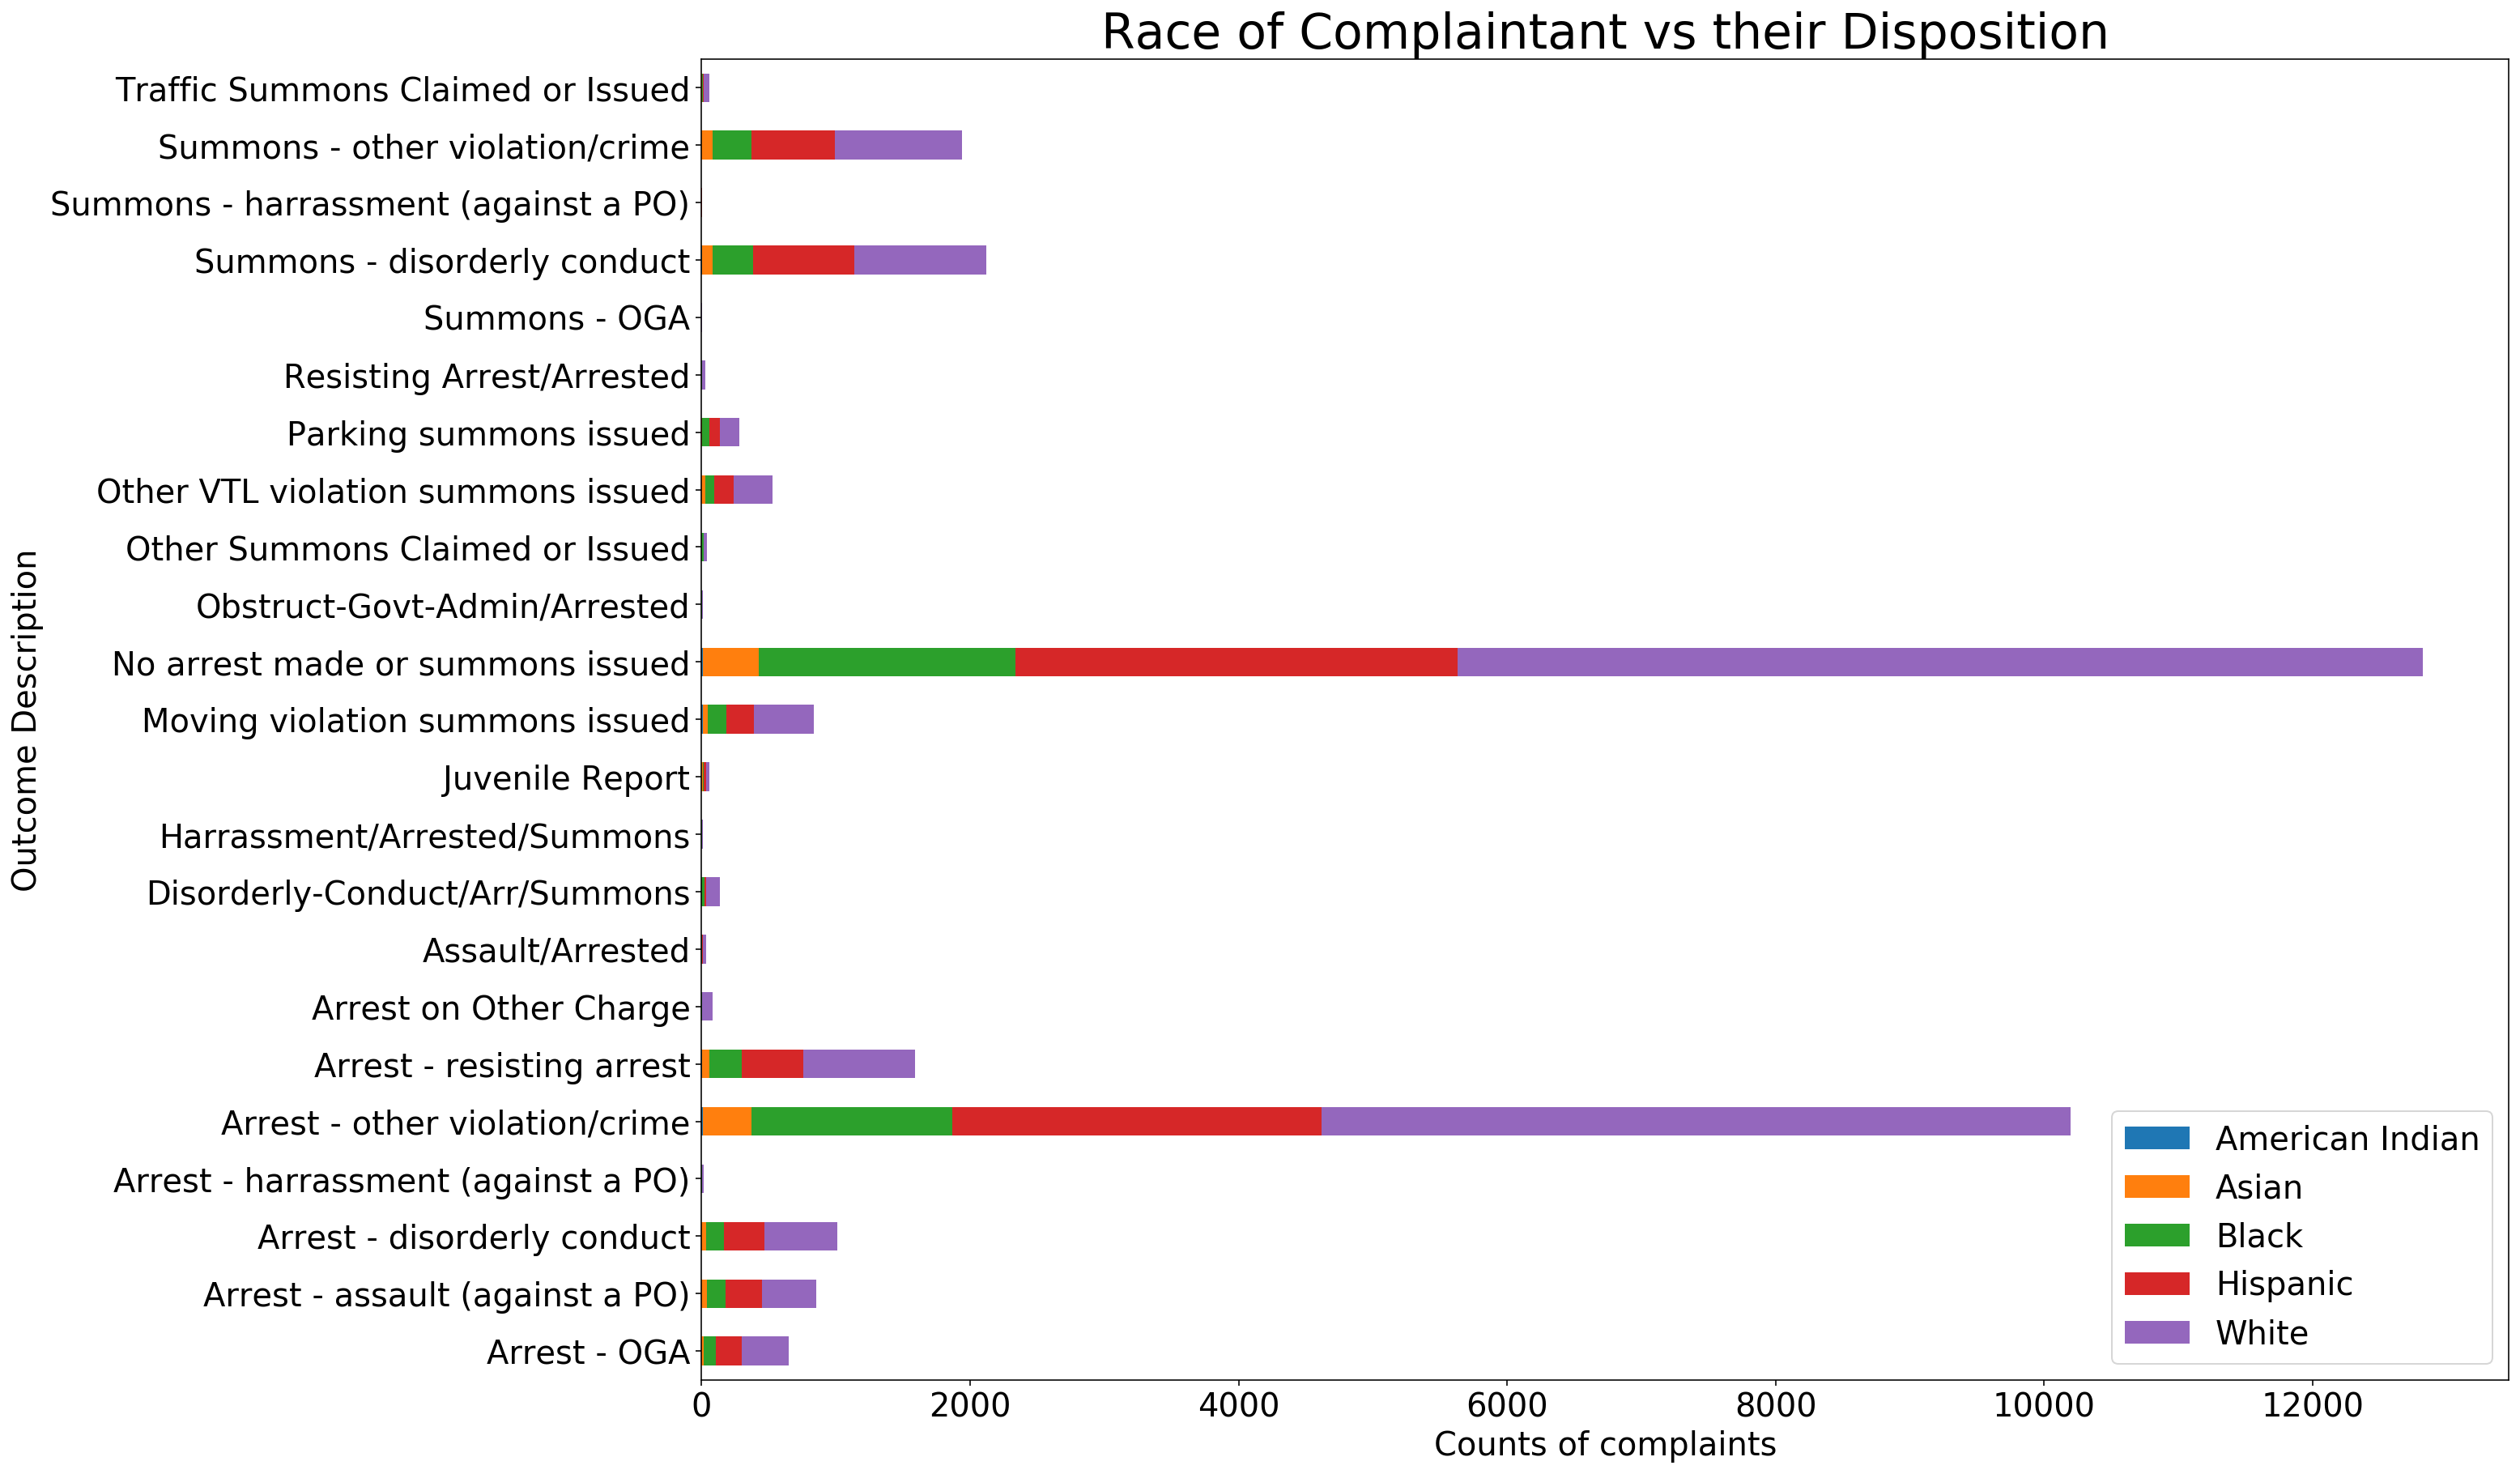

In [16]:
# Viz of pivot table of race of officer vs outcome description

c = df.groupby('outcome_description')['mos_ethnicity']\
    .value_counts()\
    .unstack(level=1)\
    .plot.barh(stacked=True, figsize = (20, 15), fontsize = 20)
plt.legend(loc = "lower right", prop={'size': 20})
plt.xlabel('Counts of complaints', fontsize = 20)
plt.ylabel('Outcome Description', fontsize = 20)
plt.title('Race of Complaintant vs their Disposition', fontsize = 30)
plt.show()

#### Key points from this graph 
- There is a huge chunk of individuals who are white where no arrest or summons were made
- Hispanic officers make up for the next most number of no arrests

In [17]:
# Pivot table of race of complaintant vs outcome description
pd.pivot_table(df, values = 'allegation', index = 'outcome_description', columns = 'complainant_ethnicity', aggfunc = 'count').fillna(0)

complainant_ethnicity,American Indian,Asian,Black,Hispanic,Other Race,White
outcome_description,,,,,,
Arrest - OGA,0.0,12.0,421.0,100.0,6.0,38.0
Arrest - assault (against a PO),0.0,8.0,546.0,139.0,24.0,75.0
Arrest - disorderly conduct,0.0,7.0,595.0,249.0,20.0,70.0
Arrest - harrassment (against a PO),0.0,0.0,8.0,0.0,2.0,1.0
Arrest - other violation/crime,8.0,121.0,5390.0,2139.0,224.0,670.0
Arrest - resisting arrest,0.0,25.0,888.0,373.0,37.0,111.0
Juvenile Report,0.0,0.0,35.0,6.0,0.0,0.0
Moving violation summons issued,2.0,54.0,389.0,150.0,20.0,162.0
No arrest made or summons issued,34.0,218.0,6145.0,2189.0,263.0,1177.0


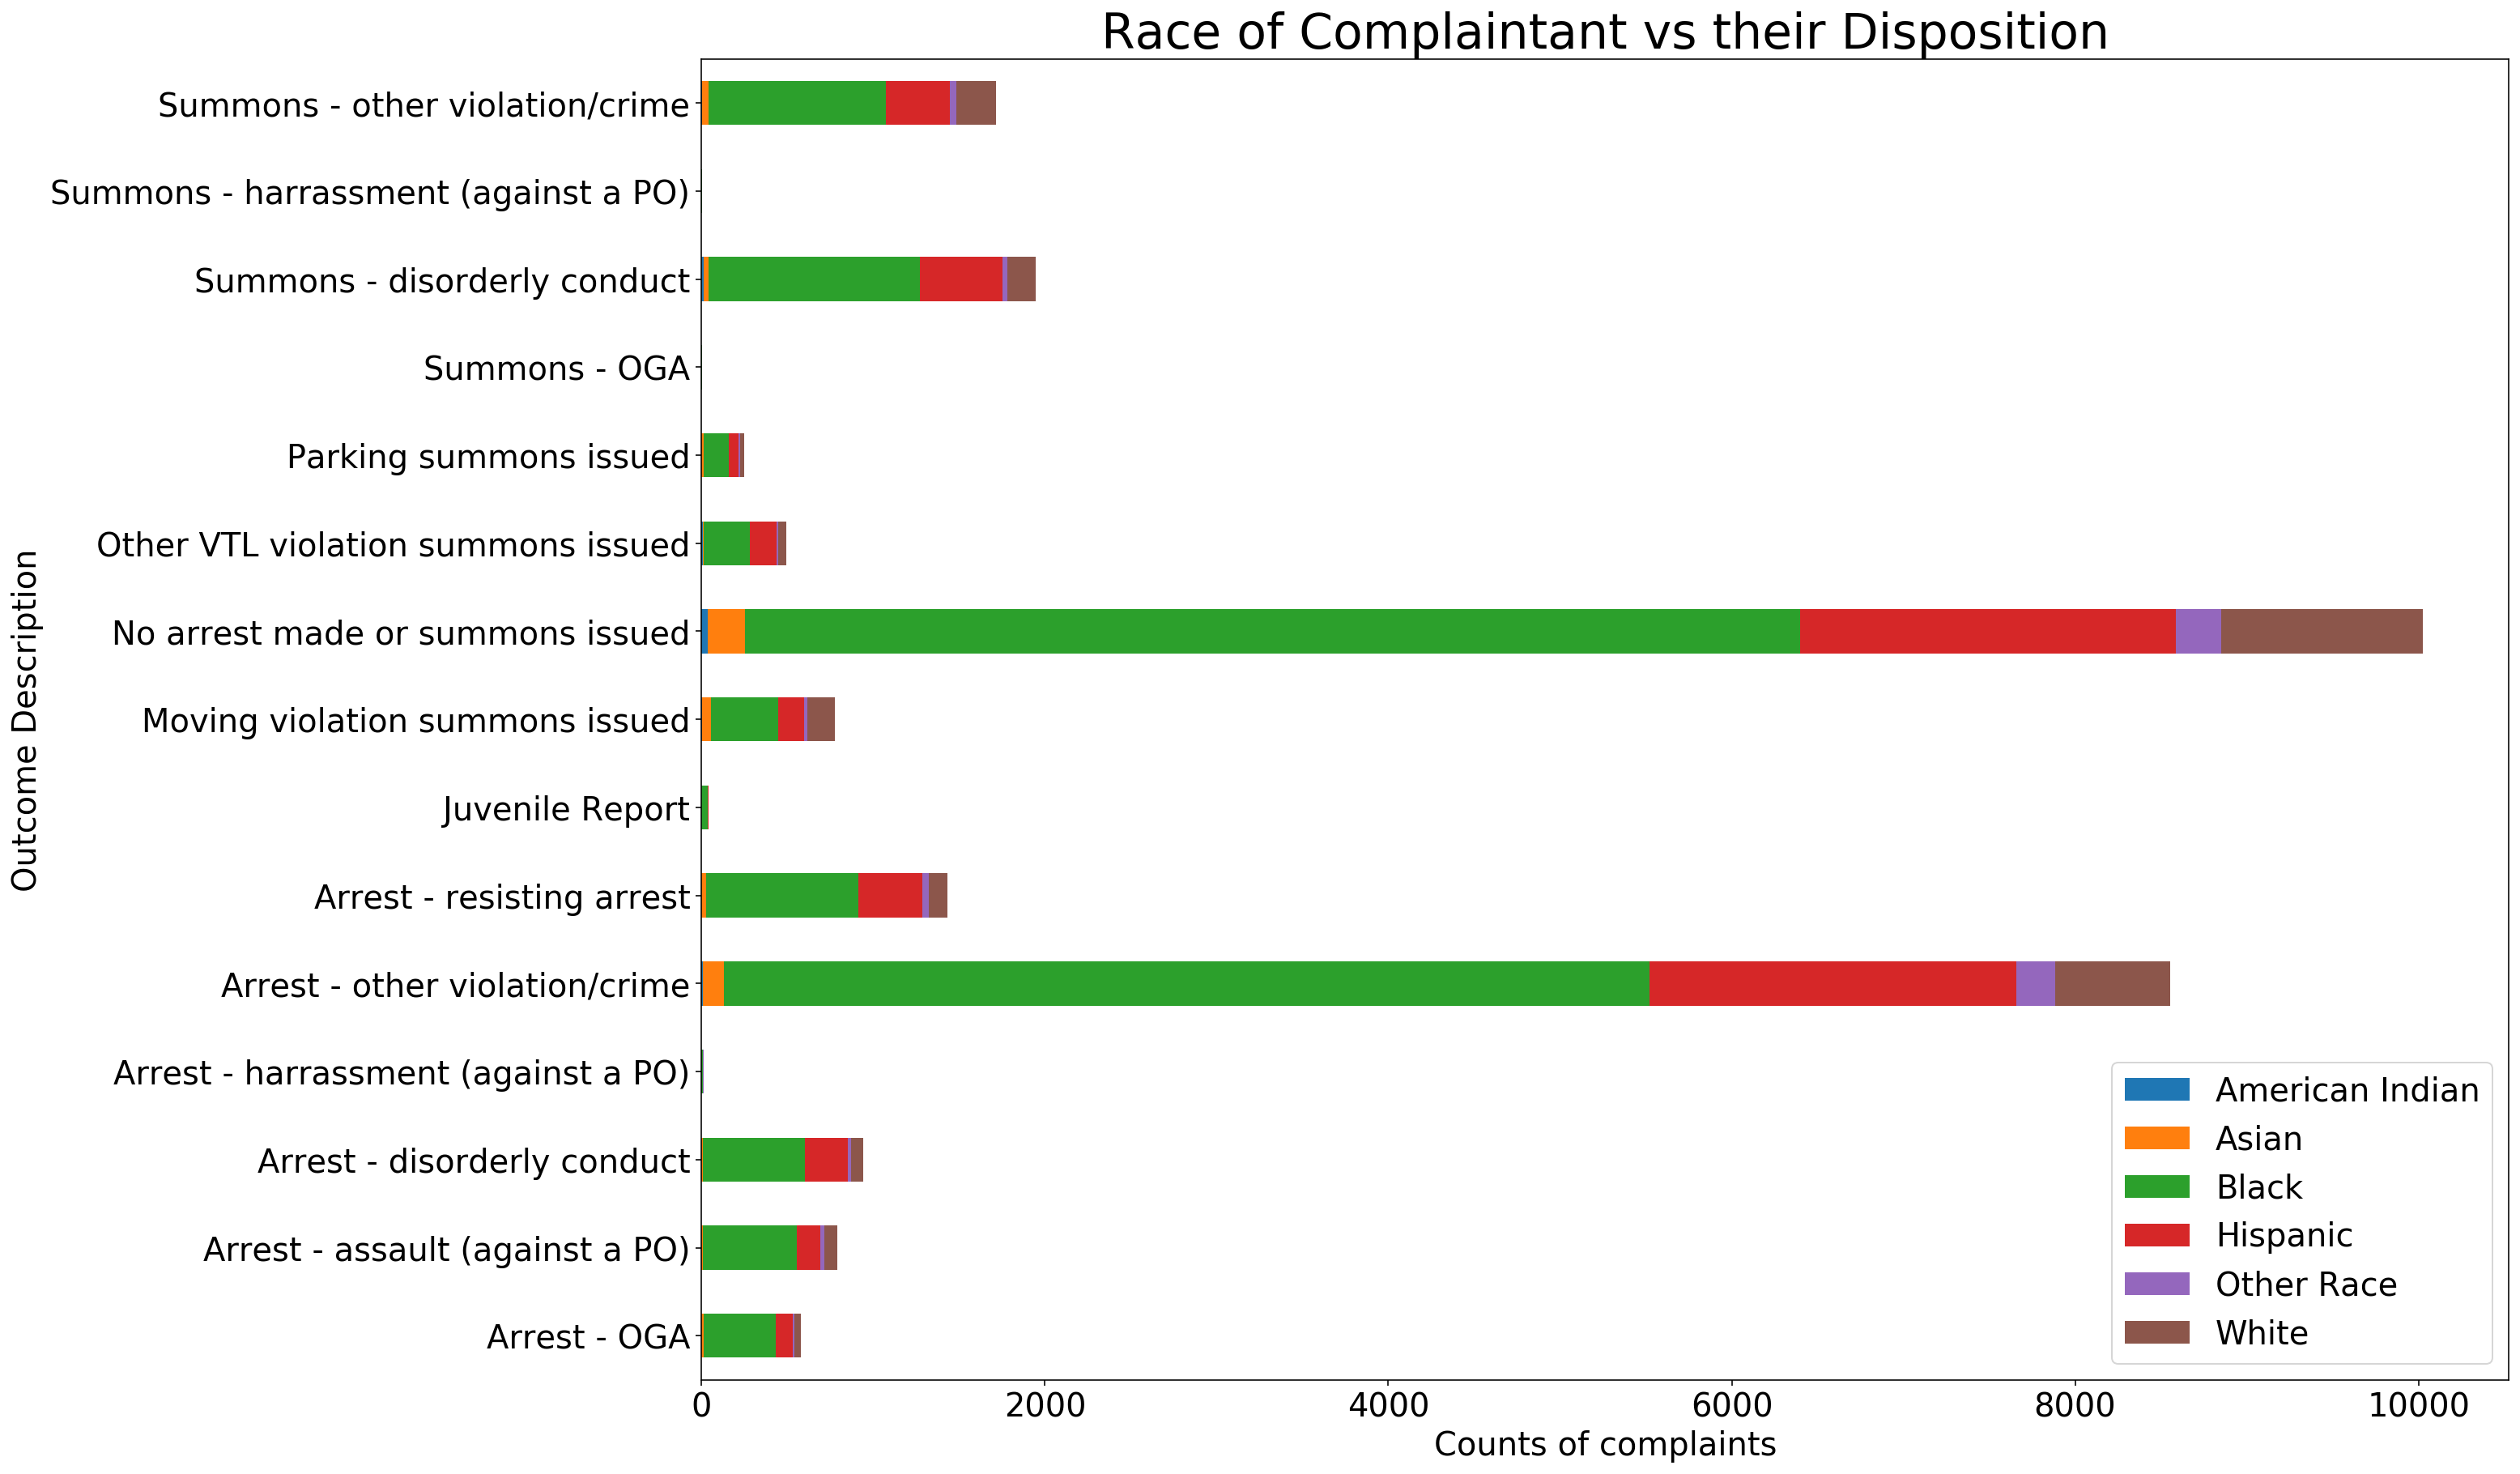

In [18]:
# Viz of pivot table of race of complaintant vs outcome description

d = df.groupby('outcome_description')['complainant_ethnicity']\
    .value_counts()\
    .unstack(level=1)\
    .plot.barh(stacked=True, figsize = (20, 15), fontsize = 20)
plt.legend(loc = "lower right", prop={'size': 20})
plt.xlabel('Counts of complaints', fontsize = 20)
plt.ylabel('Outcome Description', fontsize = 20)
plt.title('Race of Complaintant vs their Disposition', fontsize = 30)
plt.show()

#### Interesting insights
- There are many arrests that were made compared to other graphs, especially in cases where complaints come from black individuals
- On the same vein, there are just as many times when no arrest is made on complaints from black people. 

#### Interesting Aggregates

In [19]:
# Officer with Most Accusations, and a df of all his accusations

officer_name = df.groupby("full_name")["full_name"].count().sort_values(ascending = False).index[0]
top_off = df.loc[df["full_name"] == officer_name]
print("Officer with Most Complaints Against:", officer_name)
print("Number of Complaints Against:", len(top_off))
top_off.head();
print("\n")
print(top_off.groupby("fado_type")["fado_type"].count().sort_values(ascending = False))
print("\n")

print(top_off.groupby("outcome_description")["outcome_description"].count().sort_values(ascending = False))
print("\n")

print(top_off.groupby("board_disposition")["board_disposition"].count().sort_values(ascending = False))
# News articles on Daniel Sbarra: https://www.nydailynews.com/new-york/brooklyn/lt-daniel-sbarra-team-finest-article-1.1348075


Officer with Most Complaints Against: Daniel Sbarra
Number of Complaints Against: 75


fado_type
Abuse of Authority    42
Discourtesy           16
Force                 14
Offensive Language     3
Name: fado_type, dtype: int64


outcome_description
No arrest made or summons issued    33
Arrest - other violation/crime      26
Arrest - resisting arrest            9
Summons - disorderly conduct         5
Arrest - assault (against a PO)      1
Arrest - disorderly conduct          1
Name: outcome_description, dtype: int64


board_disposition
Unsubstantiated                       33
Exonerated                            26
Substantiated (Charges)               14
Substantiated (Command Discipline)     2
Name: board_disposition, dtype: int64


##### In this section, we honed in on the officer with the most complaints against (75 complaints!) and provided some interesting aggregate statistics based on different columns in our dataset. We also searched the officers name and were not surprised to find some articles about him.

In [20]:
# Grouping by ethnicity and age of officers who have complaints against them

df.groupby("mos_ethnicity")["mos_age_incident"].mean()

mos_ethnicity
American Indian    31.156250
Asian              32.467742
Black              33.229285
Hispanic           32.157268
White              32.196691
Name: mos_age_incident, dtype: float64

##### Looking at the mean ages of officers who have complaints against them by ethnicity

In [21]:
# Grouping by ethnicity and ages of complainants

df.groupby("complainant_ethnicity")["complainant_age_incident"].mean()

complainant_ethnicity
American Indian    31.968750
Asian              34.326376
Black              32.293317
Hispanic           31.828517
Other Race         32.122963
White              36.747914
Name: complainant_age_incident, dtype: float64

##### Looking at the mean ages of complainants by ethnicity

### Assessment of Missingness

#### - Is missingness in the complainant_ethnicity column MAR dependent on the outcome_description (what happened to the victim of a complaint case) or MAR dependent on the names of police officers?

0.19312604434542088

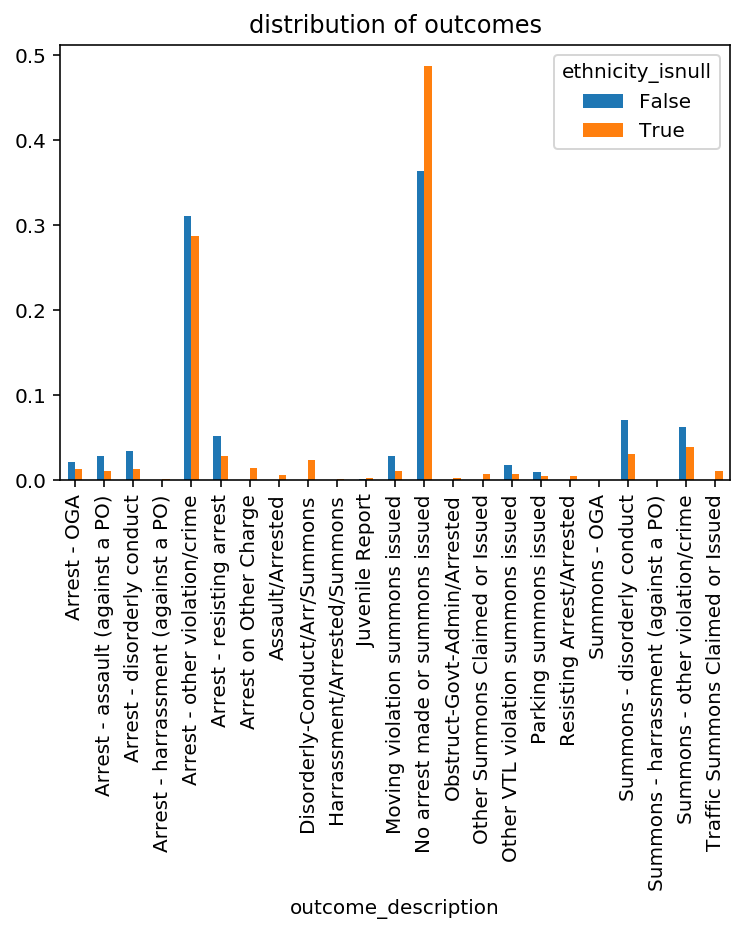

In [22]:
# Assessing missingness of complainant_ethnicity column and checking dependence on 
# outcome_description, + plotting distributions for visual

df['ethnicity_isnull'] = df.complainant_ethnicity.isnull()

emp_distributions = (
    df
    .pivot_table(columns='ethnicity_isnull', index='outcome_description', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
)
emp_distributions.plot(kind='bar', title='distribution of outcomes');
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

In [23]:
# Running permutation test

n_repetitions = 500
temp_df = df.copy()[['outcome_description', 'ethnicity_isnull']]
tvds = []
for _ in range(n_repetitions):
    # shuffle the outcome descriptions
    shuffled_descriptions = (
        temp_df['outcome_description']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    # put them in a table
    shuffled = (
        temp_df
        .assign(**{'Shuffled Outcomes': shuffled_descriptions})
    )
    # compute the tvd
    shuffed_emp_distributions = (
        shuffled
        .pivot_table(columns='ethnicity_isnull', index='Shuffled Outcomes', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    tvds.append(tvd)
    

p-value: 0.0


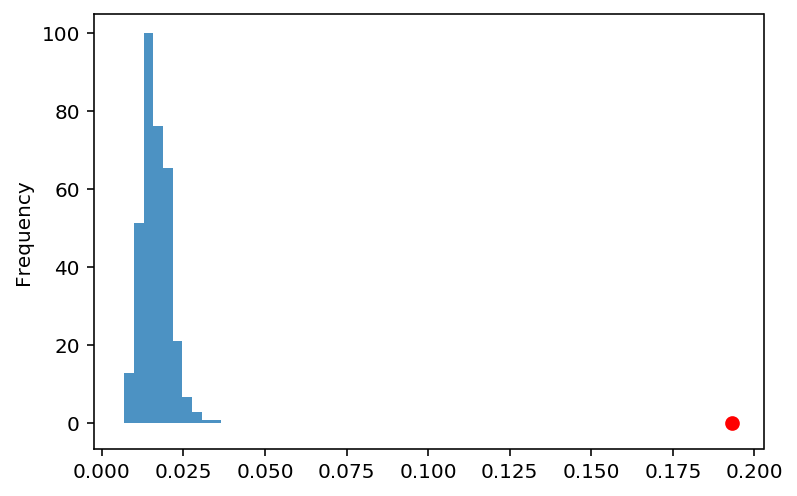

In [24]:
#calculate our P-Value and plotting

pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

p_val = (tvds >= observed_tvd).sum() / n_repetitions
print("p-value:", p_val)


#### Because the P-Value is less than our significance level of .01, we reject the null hypothesis, meaning that it is most likely not MCAR, and is either NMAR or MAR (discussed in summary of findings)

0.19312604434542088

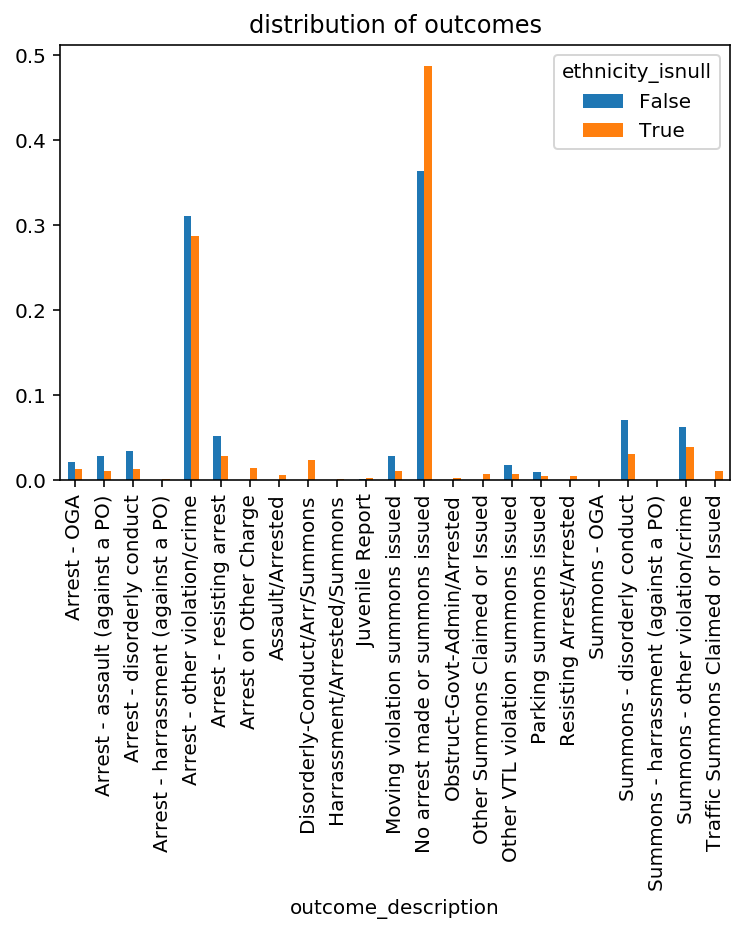

In [25]:
# Assessing missingness of complainant_ethnicity column and checking dependence on 
# officer last name, + plotting distributions for visual

df['ethnicity_isnull'] = df.complainant_ethnicity.isnull()
emp_distributions = (
    df
    .pivot_table(columns='ethnicity_isnull', index='outcome_description', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x:x/x.sum())
)

emp_distributions.plot(kind='bar', title='distribution of outcomes');
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

p-value: 1.0


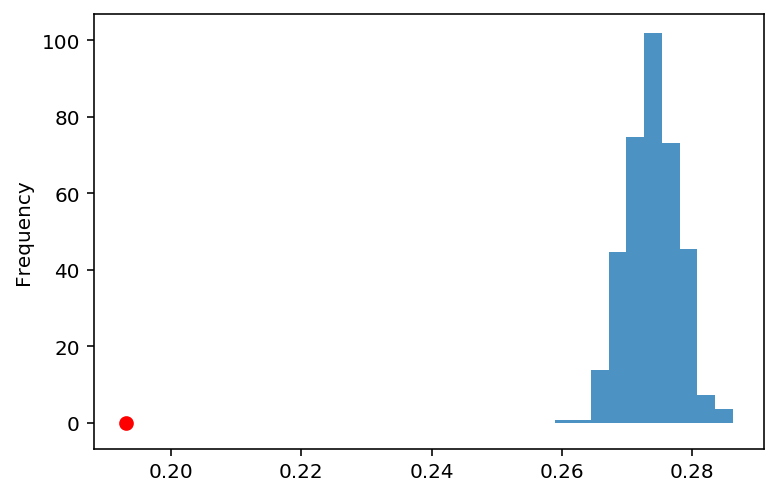

In [26]:
# Running simulation

n_repetitions = 500
temp_df = df.copy()[['last_name', 'ethnicity_isnull']]
tvds = []
for _ in range(n_repetitions):
    # shuffle the last names
    shuffled_descriptions = (
        temp_df['last_name']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    # put them in a table
    shuffled = (
        df
        .assign(**{'Shuffled Names': shuffled_descriptions})
    )
    # compute the tvd
    shuffed_emp_distributions = (
        shuffled
        .pivot_table(columns='ethnicity_isnull', index='Shuffled Names', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    tvds.append(tvd)
    
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

p_val = (tvds >= observed_tvd).sum() / n_repetitions
print("p-value:", p_val)

#### Because the P-Value is greater than our significance level of .01, we fail to reject the null hypothesis, meaning complainant ethnicity is MCAR with last name.

### Hypothesis Test

#### Question
- Is the ethnic breakdown of officers with complaints against them (proportions by ethnicity) significantly different from the ethnic breakdown of officers in the NYPD?

#### Null Hypothesis
- The ethnic breakdown of officers with complaints against them (proportions by ethnicity) is due to chance from the eligible NYPD population

#### Alternative Hypothesis
- The ethnic breakdown of officers with complaints against them (proportions by ethnicity) is not due to chance, and there is a statistically significant difference

#### Test Statistic
- Total Variation Distance

#### Significance Level
- .01

In [27]:
# Data grouping and consolidating

accused = df.groupby("mos_ethnicity")["mos_ethnicity"].count() / len(df)
true_props = pd.Series([.001, .093, .152, .294, .46], index = ["American Indian", "Asian", "Black", "Hispanic", "White"])
index = true_props.index
dictionary = {"accused_props": accused, "general_nypd_props": true_props}
df_hyp = pd.DataFrame(dictionary, index = index)
df_hyp

,accused_props,general_nypd_props
American Indian,0.000959,0.001
Asian,0.035314,0.093
Black,0.147611,0.152
Hispanic,0.274297,0.294
White,0.541819,0.460


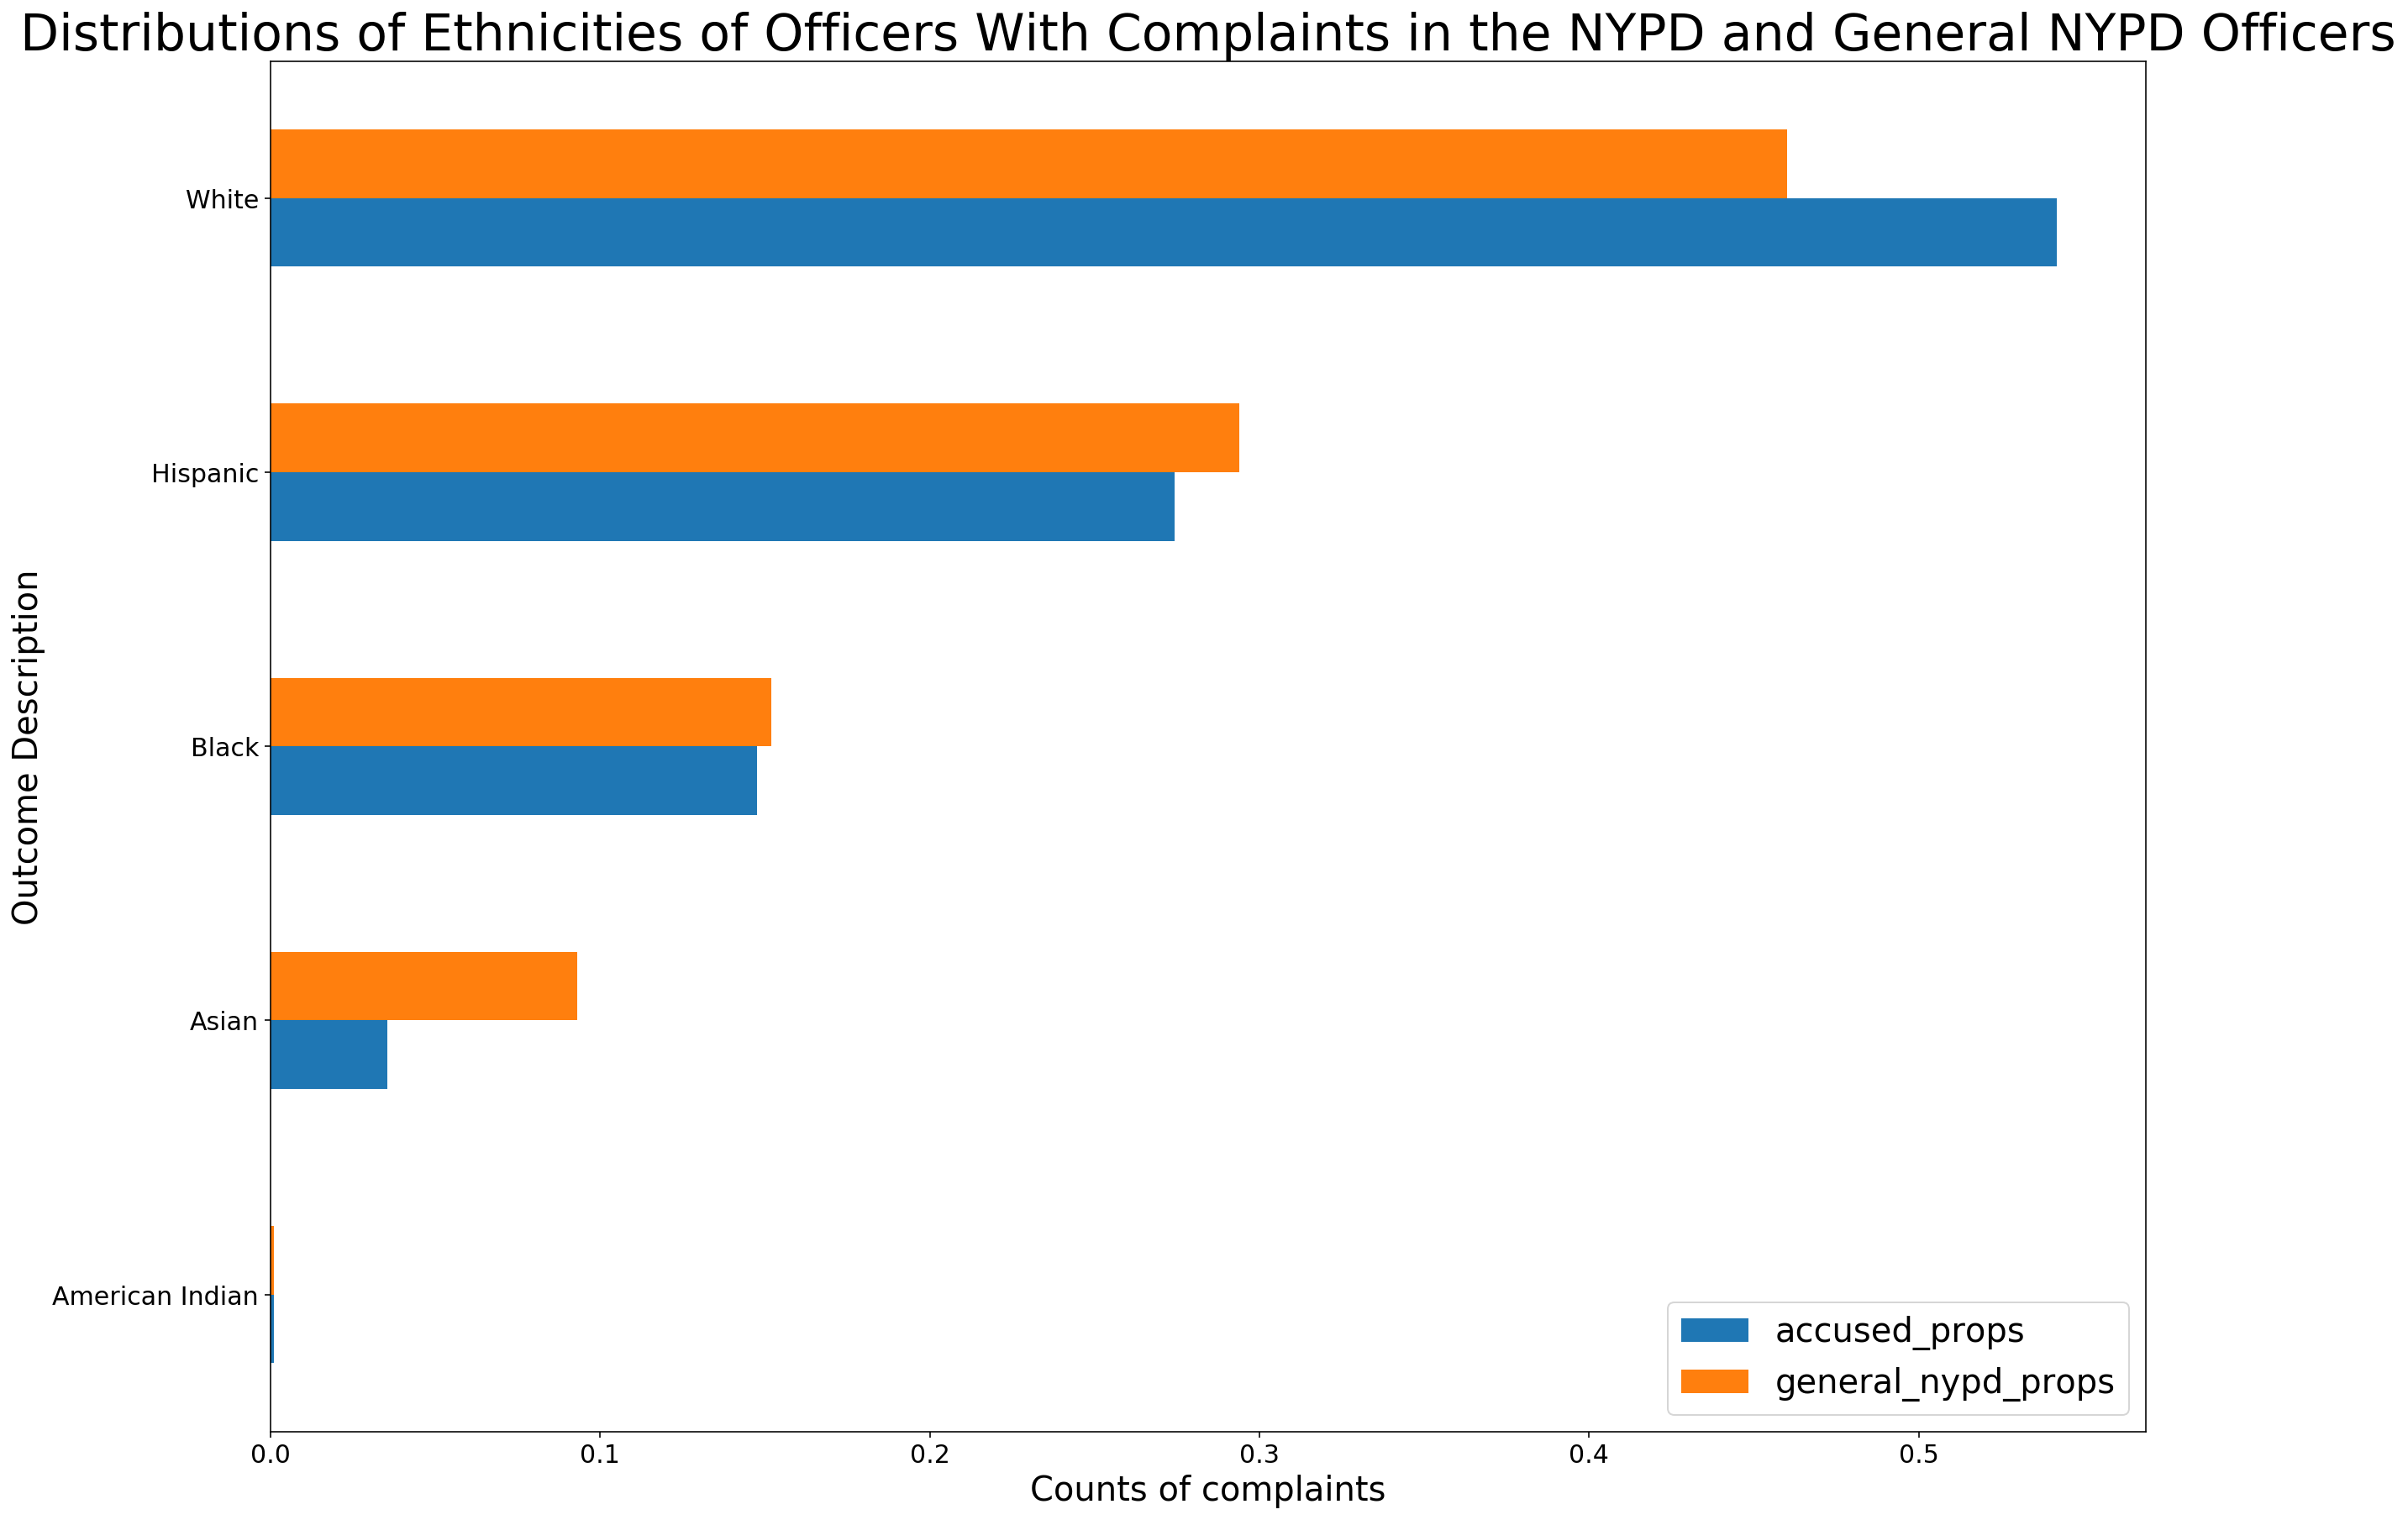

In [28]:
# Plotting distributions to see visual difference

title='Distributions of Ethnicities of Officers With Complaints in the NYPD and General NYPD Officers'
df_hyp.plot(kind='barh', title=title, figsize = (20, 15))
plt.legend(loc = "lower right", prop={'size': 20})
plt.xlabel('Counts of complaints', fontsize = 20)
plt.ylabel('Outcome Description', fontsize = 20)
plt.title(title, fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [29]:
# test statistic helper

def total_variation_distance(dist1, dist2):
    '''Given two empirical distributions, 
    both sorted with same categories, calculates the TVD'''
    return np.sum(np.abs(dist1 - dist2)) / 2

In [30]:
# observed value

observed = total_variation_distance(df_hyp["accused_props"], df_hyp["general_nypd_props"])
observed


0.08181905390011388

In [31]:
# One simulation

draw = np.random.choice(index, p = df_hyp["general_nypd_props"], size=len(df))
rand_officer_gen = pd.Series(draw).value_counts(normalize=True).rename('samp_accused_officers')
rand_officer_gen.to_frame()


,samp_accused_officers
White,0.459680
Hispanic,0.297500
Black,0.148480
Asian,0.093711
American Indian,0.000630


,samp_accused_officers
White,0.457731
Hispanic,0.296151
Black,0.154146
Asian,0.090953
American Indian,0.001019


,accused_props,general_nypd_props,samp_accused_officers
American Indian,0.000959,0.001,0.001019
Asian,0.035314,0.093,0.090953
Black,0.147611,0.152,0.154146
Hispanic,0.274297,0.294,0.296151
White,0.541819,0.460,0.457731


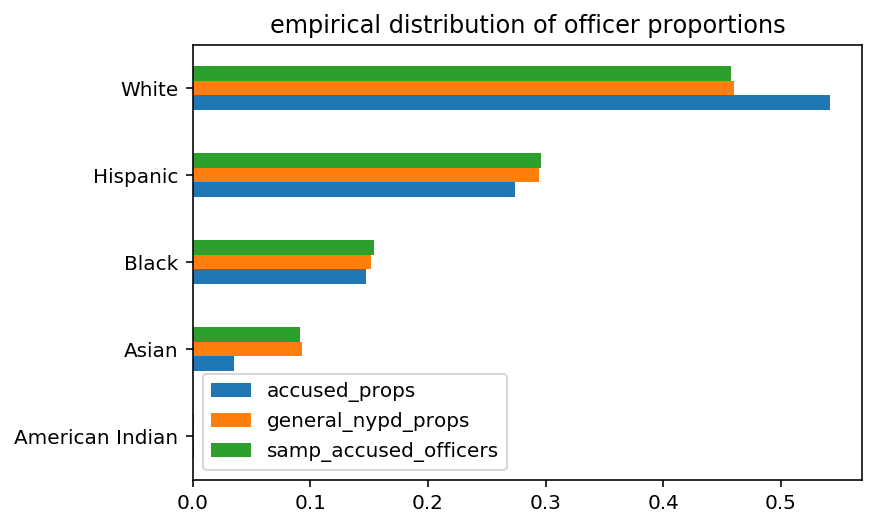

0.004316026140655942

In [32]:
# One simulation Example, with plot of 3 distributions 
# (proportions of accused officers, proportions of all nypd officers, and one sample)

draw = np.random.choice(index, p = df_hyp["general_nypd_props"], size=len(df))
rand_officer_gen = pd.Series(draw).value_counts(normalize=True).rename('samp_accused_officers')
display(rand_officer_gen.to_frame())
with_samp = df_hyp.assign(samp_accused_officers = rand_officer_gen)
display(with_samp)
with_samp.plot(kind='barh', title='empirical distribution of officer proportions')
plt.show()
display(total_variation_distance(with_samp['samp_accused_officers'], with_samp['general_nypd_props']))



p-value: 0.0


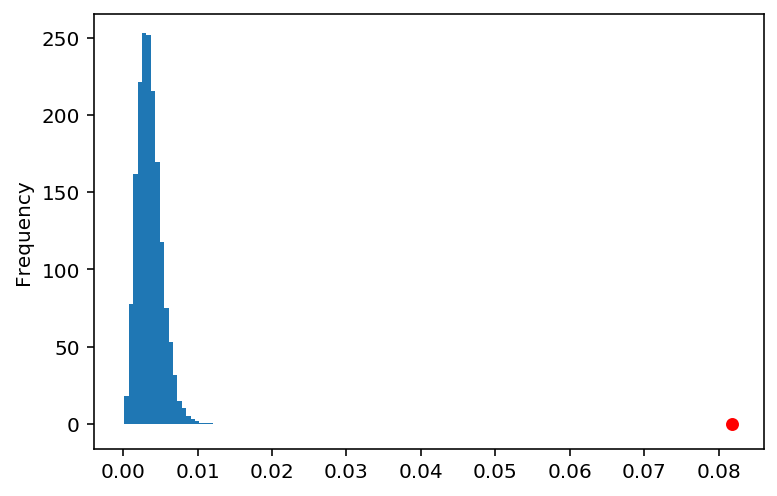

In [33]:
# Putting it together and running simulation

# Generating array of 10000 lists of 5 generated proportions from sample proportions
rndm = np.random.multinomial(len(df), df_hyp["general_nypd_props"], size=10000)
rndm = rndm / len(df) # normalize the counts

# Vectorizing TVD to apply it row-wise
tvds = np.sum(np.abs(rndm - df_hyp["general_nypd_props"].values), axis=1) / 2  

# Observed value (same as above, here for convenience)
observed = total_variation_distance(df_hyp["accused_props"], df_hyp["general_nypd_props"])

# Calculating P-Value and plotting
pd.Series(tvds).plot(kind = "hist", density = True, bins = 20)
plt.scatter(observed, 0, color='red', s=30);
p_value = np.count_nonzero(observed <= tvds) / 10000
print("p-value:", p_value)


##### Since the p-value is < .01, we reject the Null Hypothesis, meaning that the difference in the ethnic breakdown of officers who have complaints against them is highly unlikely to be due simply to random chance. See summary of findings -> Hypothesis Test for the implications of this

# Machine Learning

### Introduction

> Using the provided NYPD dataset, our team is attempting to predict the ethnicity of a complainant. This problem is a classification problem as we are trying to predict a qualitative feature, and we decided to use a RandomForestClassifier as the algorithm is quite popular/common, is generally known to work well with both categorical and numeric data, and can reduce/limit overfitting in decision trees. Still, this is just a starting point, and we will try to find a better model when creating our final model.

> In the dataset, our target variable is the feature titled "complainant_ethnicity," which stands for the ethnicity of the indvidual who filed a complaint against an officer. The question we are trying to answer is: given data filed with a police complaint such as the demographics/rank of an officer, the age of the complainant, and the outcome of the complaint, can we predict the ethnicity of the complainant?  

> To measure the performance of our model, we decided to analyze its accuracy. Unlike a model determining tumor malignancy or detecting terrorists, we were not too worried about the potential effects of false positives or false negatives in our model as they do not directly impact the lives of others in our use case. With this justification, we chose to look at the accuracy of our model to indicate how well or poorly it performed. Still, we want to be weary about the FP and FN rates, especially when it comes to minority groups being incorrectly labelled, so we will look at the confusion matrix to ensure our model is not getting high accuracy because it labels 90% of the individuals as a single race that is a majority of the population for example.  

> Taking a step back, our team thought about what we predict the results will be, as well as what they would be in a "perfect society." In a perfect world, factors like officer age, race, and rank, as well as the outcome of the complaint should not be useful features for predicting the race of the complainant. Rather, we believe that features like the officers precinct and the age of the complainant could be useful in predicting complainant ethnicity solely based on demographics. Unfortunately, we do not live in a perfect world, and we predict that officer race and rank could have some impact on the ethnicity of the individual.  

### Baseline Model
In our baseline model, we used a total of 13 features which included a mix of categorical and numerical data.  

Features that we removed with description and justification:  
> - 'unique_mos_id'/'first_name'/'last_name'/'shield_no':   
        - Officer ID, first name, last name, and shield number.  
        - Removed as they are not productive in predicting complainant ethnicity  
> - 'month_received'/'year_received'/'month_closed'/'year_closed':  
        - Month and year the complaint was made and closed  
        - Removed as we felt that the month or year a complaint was made/closed should be irrelevant  
> - 'command_at_incident'/'command_now'/'complaint_id'/'rank_abbrev_incident'/'rank_abbrev_now'  
        - Other abbreviated, reused, unnecessary features we wanted to remove.  

Features included in baseline model with type of variable (quantitative, ordinal, nominal) and description:

> - Quantitative (2): 'mos_age_incident'/'complainant_age_incident'
        - Ages of officer, age of complainants
> - Ordinal (0)
> - Nominal (11): 'rank_now'/'rank_incident'/'mos_ethnicity'/'mos_gender'/'complainant_gender'/'fado_type'/'allegation'/
'precinct'/'contact_reason'/'outcome_description'/'board_disposition'
        - Officer rank now, officer rank during complaint, officer ethnicity, 
        officer gender, complainant gender, complaint reason, reason officer 
        was called to duty, outcome description after complaint closed, 
        officer consequences

Baseline Model Accuracy: 0.8306964364926808
> We were quite pleased with the accuracy provided given this was the baseline model. This result means that our model correctly predicted the ethnicity of a complainant around 83% of the time given the features provided. Since this is a baseline model, we simply one hot encoded all the nominal data, and left the quantitative data as is. 

### Final Model
A summary of the final, improved model:
The features you added and why they are good for your data.
The model type you chose; the parameters that ended up performing best; the method of model selection used.

In the final model, we added two engineered features in addition to the features in the baseline model to improve our accuracy. We found that our final model accuracy (without gridsearch) was: 0.8349844743457046. This was a slight improvement from the baseline model, meaning that our model correctly predicts the ethnicity of a complainant around 83.4% of the time.

> - Feature One: Standard Scaling by Group of Officer Age by Officer Ethnicity
        - For this engineered feature, we are finding the z score of officer ages based 
        on their respective ethnicity. Our team hypothesized that their could be some strong 
        correlations between officer ethnicities and their ages. With this in mind, applying 
        the standard scaling by group could be a useful feature to improve our model as 
        there could be a connection between the standardized age of an officer within a 
        group and the ethnicity of the complainant.
> - Feature Two: Binarizer of Complainant Age
        - For this engineered feature, we are binarizing the ages of complainants with a 
        threshold of 40. What this means is that any complainant with an age under 40 is 
        labelled as 0, and any complainant over the age of 40 is labelled as 1. This would 
        be beneficial for the data used to train the model as our team believes there may 
        be some correlation between individuals in their respective age ranges (0-40 being 
        "young" and 40+ being "old) and their race. This could be beneficial with 
        demographics in consideration, or there may be some unique correlation between 
        these variables.

To pick the best model and the best parameters for that model, we created a two step method:

> - Step 1: Model Selection
        - For our model selection method, we picked 3 classifiers (Random Forest Classifier, 
        Decision Tree Classifier, and K Nearest Neighbors Classifier) to compare. To test 
        which model generally performed the best, we created a for loop to create a pipeline
        with each classifier (with the same data generated earlier including engineered 
        features), fit that classifier on the training data, and ran K-Fold cross validation 
        score on the training data to get a generalized score/accuracy for each model. We 
        found that the Random Forest Classifier performed the best as predicted earlier, so 
        we continued with the classifier onto step 2.
        
> - Step 2: Best Parameters Selection
        - For our best parameters selection, we used sklearn's function GridSearchCV. The 
        main paramter that we wanted to optimize was n_estimators, which defines the number
        of trees in the forest. The support for the grid search was {1, 2, 3, 4, 5, 10, 25, 
        50, 75, 100, 125}, and after running the grid search, we found that the best parameter
        was n_estimators = 125. We chose this specific support because it would make sure our
        model was somewhat simple (not incredibly layered and complex) and that the grid 
        search would run in a reasonable amount of time. 

After running our gridsearch to optimize parameters, we end with a final accuracy of 0.8432648233032678. While this was only a slightly improvement from the previous accuracy, we believe this is a better model as it is less complex and is more likely to not be overfitting the data.

### Fairness Evaluation
Creating a model that directly predicts the race of a complaintant requires caution because many inherent biases are entrenched within data that revolves around race. Consequetnly, we found it imperative that we evaluate the fairness of the model in determining the race of a complaintant between old (greater than forty years old) and young (less than forty year old) members of service. In essence, we were determing how fair our model was towards older and younger members of service in accurately determing the race of a complaintant. We found that this fairness question would be interesting to investigate to ensure our model was not biased against older officers in classififying complaintants as black. 

It is important to note that the purpose of our original model was to determine the race of a complaintant, but in order to get a more interpretable accuracy metric we decided to create a binary column, is_black, which binarizes our predictions to 1 (the prediction for the complaintant is black) or 0 (the prediction for the complaintant is not black). We also found that this methodology would better focus our fairness evaluation as it would centralize on one race rather than classifications of all races. 

In order to conduct our fairness evaluation, we used an accuracy parity as our parity measurement. The primary reason we decided to use an accuracy parity as our measurement was because we believed wanted to ensure that the accuracy for different age groups were similar. Moreover, unlike models investigating tumor malignancy or detecting terroists, the potential effects of false positives and negatives were equivalenty weighted in our eyes. Therefore, we chose the accuracy parity because it weighs positive and negative predictions equivalently. 

Having decided on our parity measurement, we conducted a permutation test to determine the fairness of our model.

- H0: My model is fair, the accuracy for the two subsets (old and young members of service) are roughly the same
- H1: My model is unfair, the accuracy for the old members of service subset is higher than the young members of service subset. 

After conducting our permutation test, we found a P-value of 0.39. Therefore, we fail to reject the null hypothesis that our model is fair, and the accuracy for the two subsets are roughly the same. With these results, we can not say for sure that the model we created is fair, but there is evidence in favor of the notion. Overall, the findings of our model should be carefully analyzed by those using it as some bias may exist. At the very least, this model provides a step in the right direction towards determining the race of complaintants in police reports against the NYPD.

# Code

In [7]:
df = pd.read_csv('allegations_202007271729.csv')

In [8]:
df.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now', 'shield_no',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition'],
      dtype='object')

In [9]:
# Code for Standard Scaler by Group from Lab 09

class StdScalerByGroup(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # X may not be a pandas dataframe (e.g. a np.array)
        df = pd.DataFrame(X)
        
        # A dictionary of means/standard-deviations for each column, for each group.
        self.grps_ = df.groupby(df.columns[0]).aggregate(["std", "mean"]).to_dict()

        return self

    def transform(self, X, y=None):
        try:
            getattr(self, "grps_")
        except AttributeError:
            raise RuntimeError("You must fit the transformer before tranforming the data!")
        
        df = pd.DataFrame(X)
        d = self.grps_
        def zscorer(row):
            # the value
            value = row[col]
            # group
            group = row[df.columns[0]]
            try:
                return (value - d[(col, 'mean')][group]) / d[col, 'std'][group]
            except ZeroDivisionError:
                return 0
        cols = list(df.columns[1:])
        df_new = pd.DataFrame()
        for col in cols:
            df_new[col] = df.apply(zscorer, axis = 1)
        df_new.index = df[df.columns[0]]
        return df_new

##### Data Cleaning

In [10]:
df.loc[(df["complainant_ethnicity"] == "Unknown") | (df["complainant_ethnicity"] == "Refused"), "complainant_ethnicity"] = np.nan
df.loc[(df["complainant_gender"] == "Not described"), "complainant_gender"] = np.nan
df_cleaned = df.iloc[:, 13:] # removing unwanted columns
df_cleaned.dropna(inplace = True) # dropping nan values
df_cleaned.head()


,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
5,Sergeant,Sergeant,Black,F,50,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,78.0,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions)


### Baseline Model

In [11]:
X,y = df_cleaned.drop('complainant_ethnicity', axis = 1), df_cleaned["complainant_ethnicity"]

X_train, X_test, y_train, y_test = train_test_split(X,y)


# One hot encoding nominal data
one_hotters = ["rank_now", "rank_incident", "precinct", "mos_gender", "mos_ethnicity", "complainant_gender", 
               "fado_type", "allegation", "contact_reason", "outcome_description", "board_disposition"]
one_hot_transformer = Pipeline([("one_hot", OneHotEncoder(handle_unknown = "ignore"))])

# Leaving numerical data as is
leaving = ["mos_age_incident", "complainant_age_incident"]
leave_transformer = Pipeline([("leaving", FunctionTransformer(lambda x:x))])

preproc = ColumnTransformer(
    transformers=[
        ('one_hotting', one_hot_transformer, one_hotters),
        ('leavers', leave_transformer, leaving)        
    ])

pl = Pipeline([("preprocessor", preproc),("classifier", RandomForestClassifier())])

pl.fit(X_train, y_train)

pl.score(X_test, y_test)


0.8306964364926808

### Final Model

In [12]:
X,y = df_cleaned.drop('complainant_ethnicity', axis = 1), df_cleaned["complainant_ethnicity"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

# One hot encoding nominal
one_hotters = ["rank_now", "rank_incident", "precinct", "mos_gender", "complainant_gender", "mos_ethnicity",
               "fado_type", "allegation", "contact_reason", "outcome_description", "board_disposition"]
one_hot_transformer = Pipeline([("one_hot", OneHotEncoder(handle_unknown = "ignore"))])

# Applying standard scalar by group
age = ["mos_ethnicity", "mos_age_incident"]
age_transformer = Pipeline([("std_scaler", StdScalerByGroup())])

# Applying complainant age binarizer
comp_age = ["complainant_age_incident"]
binarized_comp_age_transformer = Pipeline([("age_binarizer_comp", Binarizer(threshold = 40))])

# Leaving numerical data as is
leaving = ["mos_age_incident", "complainant_age_incident"]
leave_transformer = Pipeline([("leaving", FunctionTransformer(lambda x:x))])

preproc = ColumnTransformer(
    transformers=[ 
        ('one_hotting', one_hot_transformer, one_hotters),
        ('age_scale', age_transformer, age),
        ('binarizer', binarized_comp_age_transformer, comp_age),
        ('leavers', leave_transformer, leaving) 
    ])

pl = Pipeline([("preprocessor", preproc),("classifier", RandomForestClassifier())])

pl.fit(X_train, y_train)

pl.score(X_test, y_test)


0.8349844743457046

### Grid Search

In [37]:
one_hot_transformer?

##### Model Selection

In [13]:
mod_lst = [RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]
results = []
for i in mod_lst:
    pipeline = Pipeline([("preprocessor", preproc),("classifier", i)])
    pipeline.fit(X_train, y_train)
    results.append(np.mean(cross_val_score(pipeline, X_train, y_train)))
dict(list(zip(mod_lst, results)))

{RandomForestClassifier(): 0.8132214270936833,
 KNeighborsClassifier(): 0.6849552453195002,
 DecisionTreeClassifier(): 0.7658480380550541}

##### Best Parameter Selection

In [14]:
params = {
    'classifier__n_estimators': [1, 2, 3, 4, 5, 10, 25, 50, 75, 100, 125]
}
grids = GridSearchCV(pl, param_grid=params, cv=5, return_train_score=True)
grids.fit(X_train, y_train)
grids.score(X_test, y_test)

0.8432648233032678

In [15]:
grids.best_params_

{'classifier__n_estimators': 125}

### Fairness Evaluation

In [46]:
from sklearn import metrics  # has many scores for model evaluation

In [43]:
pl = Pipeline([("preprocessor", preproc),("classifier", RandomForestClassifier(n_estimators = 125))])

pl.fit(X_train, y_train)

pl.score(X_test, y_test)

0.8372024249593376

In [50]:
#finding the predictions of the model 
preds = pl.predict(X_test)

In [63]:
df_cleaned

,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
5,Sergeant,Sergeant,Black,F,50,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,78.0,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,Sergeant,Police Officer,White,M,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


In [100]:
results = X_test
results['prediction'] = preds
results['is_young'] = (results.mos_age_incident <= 40).replace({True:'young', False:'old'})
results['tag'] = y_test

<ipython-input-100-f539ac9e7f95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-2Da-2Dcopy-255Cn&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=wbT-rz1lJZQU2xAaVdeiNzsrHSbZT4z7gjW_CntTSt8&m=T8a21YtOUkMubyTSRXRkUUhBk5_HwxMPrzo4Phb0Qfc&s=M9KmgU51lpShF-1-PJXdbIaM_SQdhUHNQ-7JAsae1bI&e=   results['prediction'] = preds
<ipython-input-100-f539ac9e7f95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-2Da-2Dcopy-255Cn&d=DwIG-g&c=

In [101]:
results['is_black_pred'] = np.where(results['prediction'] == 'Black', 1, 0)

<ipython-input-101-0b6e1bafb50a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-2Da-2Dcopy-255Cn&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=wbT-rz1lJZQU2xAaVdeiNzsrHSbZT4z7gjW_CntTSt8&m=T8a21YtOUkMubyTSRXRkUUhBk5_HwxMPrzo4Phb0Qfc&s=M9KmgU51lpShF-1-PJXdbIaM_SQdhUHNQ-7JAsae1bI&e=   results['is_black_pred'] = np.where(results['prediction'] == 'Black', 1, 0)


In [102]:
results['is_black'] = np.where(results['tag'] == 'Black', 1, 0)

<ipython-input-102-beaa41495203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-2Da-2Dcopy-255Cn&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=wbT-rz1lJZQU2xAaVdeiNzsrHSbZT4z7gjW_CntTSt8&m=T8a21YtOUkMubyTSRXRkUUhBk5_HwxMPrzo4Phb0Qfc&s=M9KmgU51lpShF-1-PJXdbIaM_SQdhUHNQ-7JAsae1bI&e=   results['is_black'] = np.where(results['tag'] == 'Black', 1, 0)


In [103]:
#Demographic Parity, do more young people get classified as black
results.groupby('is_young').is_black_pred.mean().to_frame()

,is_black_pred
is_young,
old,0.675188
young,0.737455


In [104]:
(
    results
    .groupby('is_young')
    .apply(lambda x: metrics.accuracy_score(x.is_black, x.is_black_pred))
    .rename('accuracy')
    .to_frame()
)

,accuracy
is_young,
old,0.860150
young,0.850443


In [105]:
obs = results.groupby('is_young').apply(lambda x: metrics.accuracy_score(x.is_black, x.is_black_pred)).diff().iloc[-1]

metrs = []
for _ in range(100):
    s = (
        results[['is_young', 'is_black', 'is_black_pred']]
        .assign(is_young=results.is_young.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_young')
        .apply(lambda x: metrics.accuracy_score(x.is_black, x.is_black_pred))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)


0.39


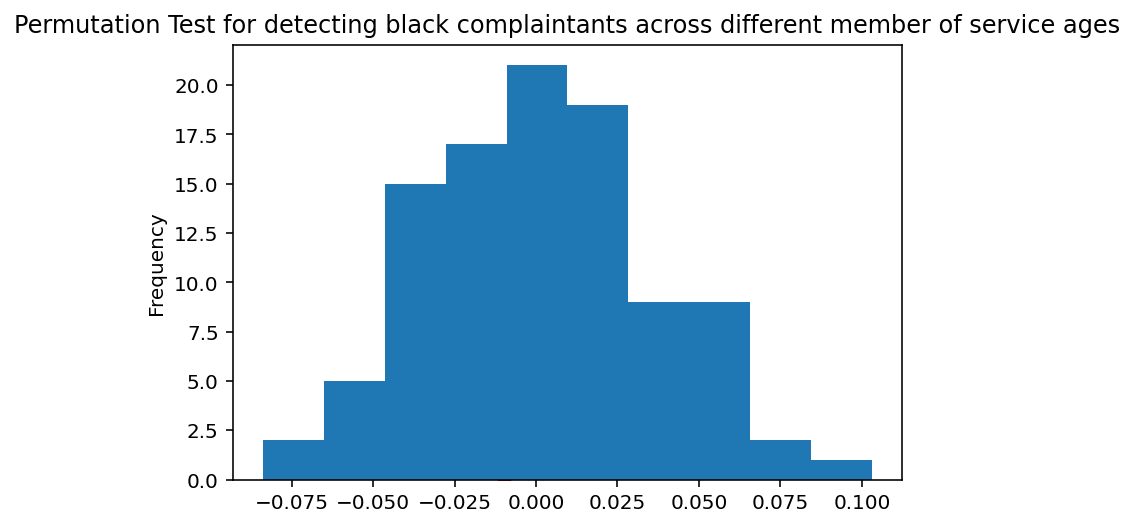

In [110]:
print(pd.Series(metrs <= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for detecting black complaintants across different member of service ages')
plt.scatter(obs, 0.1, c='r');